In [1]:
from google.colab import drive
import os
drive.mount('/content/gdrive')
# Establecer ruta de acceso en drive
os.chdir("/content/gdrive/My Drive")

Mounted at /content/gdrive


In [2]:
ruta='/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia/'
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
# Lectura de data
U= pd.read_csv(ruta+'U_Benguela.csv',sep=',',parse_dates=['time'])
V= pd.read_csv(ruta+'V_Benguela.csv',sep=',',parse_dates=['time'])
P= pd.read_csv(ruta+'P_Benguela.csv',sep=',',parse_dates=['time'])
T= pd.read_csv(ruta+'T_Benguela.csv',sep=',',parse_dates=['time'])
Q= pd.read_csv(ruta+'Q_Benguela.csv',sep=',',parse_dates=['time'])
UO= pd.read_csv(ruta+'UO_Benguela.csv',sep=',',parse_dates=['time'])
VO= pd.read_csv(ruta+'VO_Benguela.csv',sep=',',parse_dates=['time'])
SST= pd.read_csv(ruta+'SST_Benguela.csv',sep=',',parse_dates=['time'])
S= pd.read_csv(ruta+'S_Benguela.csv',sep=',',parse_dates=['time'])
O= pd.read_csv(ruta+'O_Benguela.csv',sep=',',parse_dates=['time'])
CHL= pd.read_csv(ruta+'CHL_Benguela.csv',sep=',',parse_dates=['time'])
SSH= pd.read_csv(ruta+'SSH_Benguela.csv',sep=',',parse_dates=['time'])
Rotor= pd.read_csv(ruta+'Rotor_Benguela.csv',sep=',',parse_dates=['time'])
Estres= pd.read_csv(ruta+'Estres_Benguela.csv',sep=',',parse_dates=['time'])
MLD= pd.read_csv(ruta+'MLD_Benguela.csv',sep=',',parse_dates=['time'])

In [3]:
MLD.head()

,time,Cap Frio,Luderitz,Walvis Bay,Namaqualand,Saint Elena Bay,Cape Town
0,1993-01-01,14.700524,11.133497,10.951530,10.767898,10.893854,14.466593
1,1993-01-02,13.995501,11.083834,10.843592,10.767898,10.881101,13.359904
2,1993-01-03,14.067482,11.169548,10.756211,10.767898,11.405406,13.516002
3,1993-01-04,13.800308,10.954596,10.767898,10.767898,11.256264,13.367544
4,1993-01-05,13.190664,10.767396,10.709839,10.767898,10.782797,11.470861


In [4]:
# Quitar la media de cada centro para analizar anomalias y ser ocomparable
U[list(U.columns[1:])]=U[list(U.columns[1:])] -U[list(U.columns[1:])].mean()
V[list(U.columns[1:])]=V[list(U.columns[1:])] -V[list(U.columns[1:])].mean()
P[list(U.columns[1:])]=P[list(U.columns[1:])] -P[list(U.columns[1:])].mean()
T[list(U.columns[1:])]=T[list(U.columns[1:])] -T[list(U.columns[1:])].mean()
Q[list(U.columns[1:])]=Q[list(U.columns[1:])] -Q[list(U.columns[1:])].mean()
UO[list(U.columns[1:])]=UO[list(U.columns[1:])] -UO[list(U.columns[1:])].mean()
VO[list(U.columns[1:])]=VO[list(U.columns[1:])] -VO[list(U.columns[1:])].mean()
SST[list(U.columns[1:])]=SST[list(U.columns[1:])] -SST[list(U.columns[1:])].mean()
S[list(U.columns[1:])]=S[list(U.columns[1:])] -S[list(U.columns[1:])].mean()
O[list(U.columns[1:])]=O[list(U.columns[1:])] -O[list(U.columns[1:])].mean()
CHL[list(U.columns[1:])]=CHL[list(U.columns[1:])] -CHL[list(U.columns[1:])].mean()
SSH[list(U.columns[1:])]=SSH[list(U.columns[1:])] -SSH[list(U.columns[1:])].mean()
Rotor[list(U.columns[1:])]=Rotor[list(U.columns[1:])] -Rotor[list(U.columns[1:])].mean()
Estres[list(U.columns[1:])]=Estres[list(U.columns[1:])] -Estres[list(U.columns[1:])].mean()
MLD[list(U.columns[1:])]=MLD[list(U.columns[1:])] -MLD[list(U.columns[1:])].mean()

In [ ]:
U.head()

,time,Cap Frio,Luderitz,Walvis Bay,Namaqualand,Saint Elena Bay,Cape Town
0,1993-01-01,0.479809,1.090792,1.352424,-1.028059,0.216932,-0.731770
1,1993-01-02,-0.360034,1.243380,0.972541,-1.552961,-1.475695,-3.056721
2,1993-01-03,1.084790,1.140841,0.862434,-1.225324,-1.080431,-3.144123
3,1993-01-04,2.079907,0.735811,0.299934,1.099627,0.239638,-1.516682
4,1993-01-05,3.522290,-0.566679,1.984748,0.389666,1.249647,-0.059406


In [7]:
# Grafica final 
w=1;h=0.07
import string
import matplotlib.cm  as cm
import matplotlib.dates as mdates
#colors = plt.cm.Paired(np.linspace(0, 1, 9))
#colors=['red','orange','green', 'purple', 'red','brown','pink','orangered','olive']
colors=['#1b9e77','#d95f02','#7570b3','#e7298a','#66a61e','#e6ab02','#fdc086','#ffff99']
alpha=0.9
fig = plt.figure(figsize=(3.2*4.9,4.5*4.5))
#fig,ax = plt.subplots(figsize=(18,10),nrows=5, ncols=3) # tamaño de figura
ax= plt.axes([0,1.5,w,h])
ax.text(-0.07,1.01,string.ascii_lowercase[0]+')',fontsize=20, fontweight = 'bold', transform = ax.transAxes)
#NIño
ax.axvspan(np.datetime64('2015-01-01T00:00:00.000000000'), np.datetime64('2016-01-01T00:00:00.000000000'), alpha=0.2, color='#882D17') #Very Strong
ax.axvspan(np.datetime64('1997-01-01T00:00:00.000000000'), np.datetime64('1998-01-01T00:00:00.000000000'), alpha=0.2, color='#882D17') #Very strong
#ax.axvspan(np.datetime64('2009-01-01T00:00:00.000000000'), np.datetime64('2010-01-01T00:00:00.000000000'), alpha=0.4, color='#882D17') #Moderate
#ax.axvspan(np.datetime64('2002-01-01T00:00:00.000000000'), np.datetime64('2003-01-01T00:00:00.000000000'), alpha=0.4, color='#882D17') #Moderate
#ax.axvspan(np.datetime64('1994-01-01T00:00:00.000000000'), np.datetime64('1995-01-01T00:00:00.000000000'), alpha=0.4, color='#882D17') #Moderate
#ax.axvspan(np.datetime64('2018-01-01T00:00:00.000000000'), np.datetime64('2019-01-01T00:00:00.000000000'), alpha=0.3, color='#882D17') #Weak
#ax.axvspan(np.datetime64('2014-01-01T00:00:00.000000000'), np.datetime64('2015-01-01T00:00:00.000000000'), alpha=0.3, color='#882D17') #Weak
#ax.axvspan(np.datetime64('2006-01-01T00:00:00.000000000'), np.datetime64('2007-01-01T00:00:00.000000000'), alpha=0.3, color='#882D17') #Weak
#ax.axvspan(np.datetime64('2004-01-01T00:00:00.000000000'), np.datetime64('2005-01-01T00:00:00.000000000'), alpha=0.3, color='#882D17') #Weak
#NIña
ax.axvspan(np.datetime64('2010-01-01T00:00:00.000000000'), np.datetime64('2011-01-01T00:00:00.000000000'), alpha=0.2, color='#224C98') #Very Strong
ax.axvspan(np.datetime64('2007-01-01T00:00:00.000000000'), np.datetime64('2008-01-01T00:00:00.000000000'), alpha=0.2, color='#224C98') #Very Strong
ax.axvspan(np.datetime64('1998-01-01T00:00:00.000000000'), np.datetime64('2000-01-01T00:00:00.000000000'), alpha=0.2, color='#224C98') #Very Strong
#ax.axvspan(np.datetime64('2011-01-01T00:00:00.000000000'), np.datetime64('2012-01-01T00:00:00.000000000'), alpha=0.4, color='#224C98') #Moderate
#ax.axvspan(np.datetime64('1995-01-01T00:00:00.000000000'), np.datetime64('1996-01-01T00:00:00.000000000'), alpha=0.4, color='#224C98') #Moderate
#ax.axvspan(np.datetime64('2016-01-01T00:00:00.000000000'), np.datetime64('2018-01-01T00:00:00.000000000'), alpha=0.4, color='#224C98') #Weak
#ax.axvspan(np.datetime64('2005-01-01T00:00:00.000000000'), np.datetime64('2006-01-01T00:00:00.000000000'), alpha=0.4, color='#224C98') #Weak
#ax.axvspan(np.datetime64('2008-01-01T00:00:00.000000000'), np.datetime64('2009-01-01T00:00:00.000000000'), alpha=0.4, color='#224C98') #Weak
#ax.axvspan(np.datetime64('2000-01-01T00:00:00.000000000'), np.datetime64('2001-01-01T00:00:00.000000000'), alpha=0.4, color='#224C98') #Weak
ax.plot(UO.time,UO['Cap Frio'],c=colors[0],label='Cap Frio',linestyle='-',linewidth=0.5,alpha=alpha);ax.plot(UO.time,UO['Luderitz'],c=colors[1],label='Luderitz',linestyle='--',linewidth=0.5,alpha=alpha);
ax.plot(UO.time,UO['Walvis Bay'],c=colors[2],label='Walvis Bay',linestyle=':',linewidth=0.5,alpha=alpha);ax.plot(UO.time,UO['Namaqualand'],c=colors[3],label='Namaqualand',linestyle='-.',linewidth=0.5,alpha=alpha);
ax.plot(UO.time,UO['Saint Elena Bay'],c=colors[4],label='Saint Elena Bay',linestyle='-.',linewidth=0.5,alpha=alpha);
ax.plot(UO.time,UO['Cape Town'],c=colors[6],label='Cape Town',linestyle='-.',linewidth=0.5,alpha=alpha);
ax.set_ylabel(r'$m s^{-1}$')
ax.autoscale(enable=True, axis='x', tight=True)
ax.set_title('Zonal component currents (U)', fontweight='bold',fontsize=14)
ax.autoscale(enable=True, axis='x', tight=True);year = mdates.YearLocator(1,month=1,day=1)
year_fmt = mdates.DateFormatter('%Y');ax.xaxis.set_major_locator(year)
ax.xaxis.set_major_formatter(year_fmt);ax.minorticks_off()

ax = plt.axes([0,1.4,w,h])
ax.text(-0.07,1.01,string.ascii_lowercase[1]+')',fontsize=20, fontweight = 'bold', transform = ax.transAxes)
#ax[0,1].legend(ncol=9,fontsize='small',loc='upper center')
#Niño
ax.axvspan(np.datetime64('2015-01-01T00:00:00.000000000'), np.datetime64('2016-01-01T00:00:00.000000000'), alpha=0.2, color='#882D17') #Very Strong
ax.axvspan(np.datetime64('1997-01-01T00:00:00.000000000'), np.datetime64('1998-01-01T00:00:00.000000000'), alpha=0.2, color='#882D17') #Very strong
#NIña
ax.axvspan(np.datetime64('2010-01-01T00:00:00.000000000'), np.datetime64('2011-01-01T00:00:00.000000000'), alpha=0.2, color='#224C98') #Very Strong
ax.axvspan(np.datetime64('2007-01-01T00:00:00.000000000'), np.datetime64('2008-01-01T00:00:00.000000000'), alpha=0.2, color='#224C98') #Very Strong
ax.axvspan(np.datetime64('1998-01-01T00:00:00.000000000'), np.datetime64('2000-01-01T00:00:00.000000000'), alpha=0.2, color='#224C98') #Very Strong
ax.plot(VO.time,VO['Cap Frio'],c=colors[0],label='Cap Frio',linestyle='-',linewidth=0.5,alpha=alpha);ax.plot(VO.time,VO['Luderitz'],c=colors[1],label='Luderitz',linestyle='--',linewidth=0.5,alpha=alpha);
ax.plot(VO.time,VO['Walvis Bay'],c=colors[2],label='Walvis Bay',linestyle=':',linewidth=0.5,alpha=alpha);ax.plot(VO.time,VO['Namaqualand'],c=colors[3],label='Namaqualand',linestyle='-.',linewidth=0.5,alpha=alpha);
ax.plot(VO.time,VO['Saint Elena Bay'],c=colors[4],label='Saint Elena Bay',linestyle='-.',linewidth=0.5,alpha=alpha);
ax.plot(VO.time,VO['Cape Town'],c=colors[6],label='Cape Town',linestyle='-.',linewidth=0.5,alpha=alpha);
ax.set_ylabel(r'$m s^{-1}$')
ax.set_title('Meridional component currents (V)', fontweight='bold',fontsize=14)
ax.autoscale(enable=True, axis='x', tight=True);year = mdates.YearLocator(1,month=1,day=1)
year_fmt = mdates.DateFormatter('%Y');ax.xaxis.set_major_locator(year)
ax.xaxis.set_major_formatter(year_fmt);ax.minorticks_off()

ax = plt.axes([0,1.3,w,h])
ax.text(-0.07,1.01,string.ascii_lowercase[2]+')',fontsize=20, fontweight = 'bold', transform = ax.transAxes)
#ax[0,2].legend(ncol=9,fontsize='small',loc='upper center')
#Niño
ax.axvspan(np.datetime64('2015-01-01T00:00:00.000000000'), np.datetime64('2016-01-01T00:00:00.000000000'), alpha=0.2, color='#882D17') #Very Strong
ax.axvspan(np.datetime64('1997-01-01T00:00:00.000000000'), np.datetime64('1998-01-01T00:00:00.000000000'), alpha=0.2, color='#882D17') #Very strong
#NIña
ax.axvspan(np.datetime64('2010-01-01T00:00:00.000000000'), np.datetime64('2011-01-01T00:00:00.000000000'), alpha=0.2, color='#224C98') #Very Strong
ax.axvspan(np.datetime64('2007-01-01T00:00:00.000000000'), np.datetime64('2008-01-01T00:00:00.000000000'), alpha=0.2, color='#224C98') #Very Strong
ax.axvspan(np.datetime64('1998-01-01T00:00:00.000000000'), np.datetime64('2000-01-01T00:00:00.000000000'), alpha=0.2, color='#224C98') #Very Strong
ax.plot(SST.time,SST['Cap Frio'],c=colors[0],label='Cap Frio',linestyle='-',linewidth=0.5,alpha=alpha);ax.plot(SST.time,SST['Luderitz'],c=colors[1],label='Luderitz',linestyle='--',linewidth=0.5,alpha=alpha);
ax.plot(SST.time,SST['Walvis Bay'],c=colors[2],label='Walvis Bay',linestyle=':',linewidth=0.5,alpha=alpha);ax.plot(SST.time,SST['Namaqualand'],c=colors[3],label='Namaqualand',linestyle='-.',linewidth=0.5,alpha=alpha);
ax.plot(SST.time,SST['Saint Elena Bay'],c=colors[4],label='Saint Elena Bay',linestyle='-.',linewidth=0.5,alpha=alpha);
ax.plot(SST.time,SST['Cape Town'],c=colors[6],label='Cape Town',linestyle='-.',linewidth=0.5,alpha=alpha);
ax.set_ylabel(r'$°C$')
ax.set_title('Sea surface temperature', fontweight='bold',fontsize=14)
ax.autoscale(enable=True, axis='x', tight=True);year = mdates.YearLocator(1,month=1,day=1)
year_fmt = mdates.DateFormatter('%Y');ax.xaxis.set_major_locator(year)
ax.xaxis.set_major_formatter(year_fmt);ax.minorticks_off()

ax = plt.axes([0,1.2,w,h])
ax.text(-0.07,1.01,string.ascii_lowercase[3]+')',fontsize=20, fontweight = 'bold', transform = ax.transAxes)
#ax[1,0].legend(ncol=9,fontsize='small',loc='upper center')
#Niño
ax.axvspan(np.datetime64('2015-01-01T00:00:00.000000000'), np.datetime64('2016-01-01T00:00:00.000000000'), alpha=0.2, color='#882D17') #Very Strong
ax.axvspan(np.datetime64('1997-01-01T00:00:00.000000000'), np.datetime64('1998-01-01T00:00:00.000000000'), alpha=0.2, color='#882D17') #Very strong
#NIña
ax.axvspan(np.datetime64('2010-01-01T00:00:00.000000000'), np.datetime64('2011-01-01T00:00:00.000000000'), alpha=0.2, color='#224C98') #Very Strong
ax.axvspan(np.datetime64('2007-01-01T00:00:00.000000000'), np.datetime64('2008-01-01T00:00:00.000000000'), alpha=0.2, color='#224C98') #Very Strong
ax.axvspan(np.datetime64('1998-01-01T00:00:00.000000000'), np.datetime64('2000-01-01T00:00:00.000000000'), alpha=0.2, color='#224C98') #Very Strong
ax.plot(S.time,S['Cap Frio'],c=colors[0],label='Cap Frio',linestyle='-',linewidth=0.5,alpha=alpha);ax.plot(S.time,S['Luderitz'],c=colors[1],label='Luderitz',linestyle='--',linewidth=0.5,alpha=alpha);
ax.plot(S.time,S['Walvis Bay'],c=colors[2],label='Walvis Bay',linestyle=':',linewidth=0.5,alpha=alpha);ax.plot(S.time,S['Namaqualand'],c=colors[3],label='Namaqualand',linestyle='-.',linewidth=0.5,alpha=alpha);
ax.plot(S.time,S['Saint Elena Bay'],c=colors[4],label='Saint Elena Bay',linestyle='-.',linewidth=0.5,alpha=alpha);
ax.plot(S.time,S['Cape Town'],c=colors[6],label='Cape Town',linestyle='-.',linewidth=0.5,alpha=alpha);
ax.set_ylabel(r'$PSU$')
ax.set_title('Sea surface salinity', fontweight='bold',fontsize=14)
ax.autoscale(enable=True, axis='x', tight=True);year = mdates.YearLocator(1,month=1,day=1)
year_fmt = mdates.DateFormatter('%Y');ax.xaxis.set_major_locator(year)
ax.xaxis.set_major_formatter(year_fmt);ax.minorticks_off()

ax = plt.axes([0,1.1,w,h])
ax.text(-0.07,1.01,string.ascii_lowercase[4]+')',fontsize=20, fontweight = 'bold', transform = ax.transAxes)
#ax].legend(ncol=9,fontsize='small',loc='upper center')
#Niño
ax.axvspan(np.datetime64('2015-01-01T00:00:00.000000000'), np.datetime64('2016-01-01T00:00:00.000000000'), alpha=0.2, color='#882D17') #Very Strong
ax.axvspan(np.datetime64('1997-01-01T00:00:00.000000000'), np.datetime64('1998-01-01T00:00:00.000000000'), alpha=0.2, color='#882D17') #Very strong
#NIña
ax.axvspan(np.datetime64('2010-01-01T00:00:00.000000000'), np.datetime64('2011-01-01T00:00:00.000000000'), alpha=0.2, color='#224C98') #Very Strong
ax.axvspan(np.datetime64('2007-01-01T00:00:00.000000000'), np.datetime64('2008-01-01T00:00:00.000000000'), alpha=0.2, color='#224C98') #Very Strong
ax.axvspan(np.datetime64('1998-01-01T00:00:00.000000000'), np.datetime64('2000-01-01T00:00:00.000000000'), alpha=0.2, color='#224C98') #Very Strong
ax.plot(O.time,O['Cap Frio'],c=colors[0],label='Cap Frio',linestyle='-',linewidth=0.5,alpha=alpha);ax.plot(O.time,O['Luderitz'],c=colors[1],label='Luderitz',linestyle='--',linewidth=0.5,alpha=alpha);
ax.plot(O.time,O['Walvis Bay'],c=colors[2],label='Walvis Bay',linestyle=':',linewidth=0.5,alpha=alpha);ax.plot(O.time,O['Namaqualand'],c=colors[3],label='Namaqualand',linestyle='-.',linewidth=0.5,alpha=alpha);
ax.plot(O.time,O['Saint Elena Bay'],c=colors[4],label='Saint Elena Bay',linestyle='-.',linewidth=0.5,alpha=alpha);
ax.plot(O.time,O['Cape Town'],c=colors[6],label='Cape Town',linestyle='-.',linewidth=0.5,alpha=alpha);
ax.set_ylabel(r'$mmol m^{-3}$')
ax.set_title('Sea surface oxygen', fontweight='bold',fontsize=14)
ax.autoscale(enable=True, axis='x', tight=True);year = mdates.YearLocator(1,month=1,day=1)
year_fmt = mdates.DateFormatter('%Y');ax.xaxis.set_major_locator(year)
ax.xaxis.set_major_formatter(year_fmt);ax.minorticks_off()

ax = plt.axes([0,1.0,w,h])
ax.text(-0.07,1.01,string.ascii_lowercase[5]+')',fontsize=20, fontweight = 'bold', transform = ax.transAxes)
#ax.legend(ncol=9,fontsize='small',loc='upper center')
#Niño
ax.axvspan(np.datetime64('2015-01-01T00:00:00.000000000'), np.datetime64('2016-01-01T00:00:00.000000000'), alpha=0.2, color='#882D17') #Very Strong
ax.axvspan(np.datetime64('1997-01-01T00:00:00.000000000'), np.datetime64('1998-01-01T00:00:00.000000000'), alpha=0.2, color='#882D17') #Very strong
#NIña
ax.axvspan(np.datetime64('2010-01-01T00:00:00.000000000'), np.datetime64('2011-01-01T00:00:00.000000000'), alpha=0.2, color='#224C98') #Very Strong
ax.axvspan(np.datetime64('2007-01-01T00:00:00.000000000'), np.datetime64('2008-01-01T00:00:00.000000000'), alpha=0.2, color='#224C98') #Very Strong
ax.axvspan(np.datetime64('1998-01-01T00:00:00.000000000'), np.datetime64('2000-01-01T00:00:00.000000000'), alpha=0.2, color='#224C98') #Very Strong
ax.plot(CHL.time,CHL['Cap Frio'],c=colors[0],label='Cap Frio',linestyle='-',linewidth=0.5,alpha=alpha);ax.plot(CHL.time,CHL['Luderitz'],c=colors[1],label='Luderitz',linestyle='--',linewidth=0.5,alpha=alpha);
ax.plot(CHL.time,CHL['Walvis Bay'],c=colors[2],label='Walvis Bay',linestyle=':',linewidth=0.5,alpha=alpha);ax.plot(CHL.time,CHL['Namaqualand'],c=colors[3],label='Namaqualand',linestyle='-.',linewidth=0.5,alpha=alpha);
ax.plot(CHL.time,CHL['Saint Elena Bay'],c=colors[4],label='Saint Elena Bay',linestyle='-.',linewidth=0.5,alpha=alpha);
ax.plot(CHL.time,CHL['Cape Town'],c=colors[6],label='Cape Town',linestyle='-.',linewidth=0.5,alpha=alpha);
ax.set_ylabel(r'$mg m^{-3}$')
ax.set_title('Chlorophyll', fontweight='bold',fontsize=14)
ax.autoscale(enable=True, axis='x', tight=True);year = mdates.YearLocator(1,month=1,day=1)
year_fmt = mdates.DateFormatter('%Y');ax.xaxis.set_major_locator(year)
ax.xaxis.set_major_formatter(year_fmt);ax.minorticks_off()

ax = plt.axes([0,0.9,w,h])
ax.text(-0.07,1.01,string.ascii_lowercase[6]+')',fontsize=20, fontweight = 'bold', transform = ax.transAxes)
#ax.legend(ncol=9,fontsize='small',loc='upper center')
#Niño
ax.axvspan(np.datetime64('2015-01-01T00:00:00.000000000'), np.datetime64('2016-01-01T00:00:00.000000000'), alpha=0.2, color='#882D17') #Very Strong
ax.axvspan(np.datetime64('1997-01-01T00:00:00.000000000'), np.datetime64('1998-01-01T00:00:00.000000000'), alpha=0.2, color='#882D17') #Very strong
#NIña
ax.axvspan(np.datetime64('2010-01-01T00:00:00.000000000'), np.datetime64('2011-01-01T00:00:00.000000000'), alpha=0.2, color='#224C98') #Very Strong
ax.axvspan(np.datetime64('2007-01-01T00:00:00.000000000'), np.datetime64('2008-01-01T00:00:00.000000000'), alpha=0.2, color='#224C98') #Very Strong
ax.axvspan(np.datetime64('1998-01-01T00:00:00.000000000'), np.datetime64('2000-01-01T00:00:00.000000000'), alpha=0.2, color='#224C98') #Very Strong
ax.plot(SSH.time,SSH['Cap Frio'],c=colors[0],label='Cap Frio',linestyle='-',linewidth=0.5,alpha=alpha);ax.plot(SSH.time,SSH['Luderitz'],c=colors[1],label='Luderitz',linestyle='--',linewidth=0.5,alpha=alpha);
ax.plot(SSH.time,SSH['Walvis Bay'],c=colors[2],label='Walvis Bay',linestyle=':',linewidth=0.5,alpha=alpha);ax.plot(SSH.time,SSH['Namaqualand'],c=colors[3],label='Namaqualand',linestyle='-.',linewidth=0.5,alpha=alpha);
ax.plot(SSH.time,SSH['Saint Elena Bay'],c=colors[4],label='Saint Elena Bay',linestyle='-.',linewidth=0.5,alpha=alpha);
ax.plot(SSH.time,SSH['Cape Town'],c=colors[6],label='Cape Town',linestyle='-.',linewidth=0.5,alpha=alpha);
ax.set_ylabel(r'$m$')
ax.set_title('Sea surface height', fontweight='bold',fontsize=14)
ax.autoscale(enable=True, axis='x', tight=True);year = mdates.YearLocator(1,month=1,day=1)
year_fmt = mdates.DateFormatter('%Y');ax.xaxis.set_major_locator(year)
ax.xaxis.set_major_formatter(year_fmt);ax.minorticks_off()

ax = plt.axes([0,0.8,w,h])
ax.text(-0.07,1.01,string.ascii_lowercase[7]+')',fontsize=20, fontweight = 'bold', transform = ax.transAxes)
#ax.legend(ncol=9,fontsize='small',loc='upper center')
#Niño
ax.axvspan(np.datetime64('2015-01-01T00:00:00.000000000'), np.datetime64('2016-01-01T00:00:00.000000000'), alpha=0.2, color='#882D17') #Very Strong
ax.axvspan(np.datetime64('1997-01-01T00:00:00.000000000'), np.datetime64('1998-01-01T00:00:00.000000000'), alpha=0.2, color='#882D17') #Very strong
#NIña
ax.axvspan(np.datetime64('2010-01-01T00:00:00.000000000'), np.datetime64('2011-01-01T00:00:00.000000000'), alpha=0.2, color='#224C98') #Very Strong
ax.axvspan(np.datetime64('2007-01-01T00:00:00.000000000'), np.datetime64('2008-01-01T00:00:00.000000000'), alpha=0.2, color='#224C98') #Very Strong
ax.axvspan(np.datetime64('1998-01-01T00:00:00.000000000'), np.datetime64('2000-01-01T00:00:00.000000000'), alpha=0.2, color='#224C98') #Very Strong
ax.plot(Rotor.time,Rotor['Cap Frio'],c=colors[0],label='Cap Frio',linestyle='-',linewidth=0.5,alpha=alpha);ax.plot(Rotor.time,Rotor['Luderitz'],c=colors[1],label='Luderitz',linestyle='--',linewidth=0.5,alpha=alpha);
ax.plot(Rotor.time,Rotor['Walvis Bay'],c=colors[2],label='Walvis Bay',linestyle=':',linewidth=0.5,alpha=alpha);ax.plot(Rotor.time,Rotor['Namaqualand'],c=colors[3],label='Namaqualand',linestyle='-.',linewidth=0.5,alpha=alpha);
ax.plot(Rotor.time,Rotor['Saint Elena Bay'],c=colors[4],label='Saint Elena Bay',linestyle='-.',linewidth=0.5,alpha=alpha);
ax.plot(Rotor.time,Rotor['Cape Town'],c=colors[6],label='Cape Town',linestyle='-.',linewidth=0.5,alpha=alpha);
ax.set_ylabel(r'$N m^{-3}$')
ax.set_title('Wind stress curl', fontweight='bold',fontsize=14)
ax.autoscale(enable=True, axis='x', tight=True);year = mdates.YearLocator(1,month=1,day=1)
year_fmt = mdates.DateFormatter('%Y');ax.xaxis.set_major_locator(year)
ax.xaxis.set_major_formatter(year_fmt);ax.minorticks_off()

ax = plt.axes([0,0.7,w,h])
ax.text(-0.07,1.01,string.ascii_lowercase[8]+')',fontsize=20, fontweight = 'bold', transform = ax.transAxes)
#ax.legend(ncol=9,fontsize='small',loc='upper center')
#Niño
ax.axvspan(np.datetime64('2015-01-01T00:00:00.000000000'), np.datetime64('2016-01-01T00:00:00.000000000'), alpha=0.2, color='#882D17') #Very Strong
ax.axvspan(np.datetime64('1997-01-01T00:00:00.000000000'), np.datetime64('1998-01-01T00:00:00.000000000'), alpha=0.2, color='#882D17') #Very strong
#NIña
ax.axvspan(np.datetime64('2010-01-01T00:00:00.000000000'), np.datetime64('2011-01-01T00:00:00.000000000'), alpha=0.2, color='#224C98') #Very Strong
ax.axvspan(np.datetime64('2007-01-01T00:00:00.000000000'), np.datetime64('2008-01-01T00:00:00.000000000'), alpha=0.2, color='#224C98') #Very Strong
ax.axvspan(np.datetime64('1998-01-01T00:00:00.000000000'), np.datetime64('2000-01-01T00:00:00.000000000'), alpha=0.2, color='#224C98') #Very Strong
ax.plot(Estres.time,Estres['Cap Frio'],c=colors[0],label='Cap Frio',linestyle='-',linewidth=0.5,alpha=alpha);ax.plot(Estres.time,Estres['Luderitz'],c=colors[1],label='Luderitz',linestyle='--',linewidth=0.5,alpha=alpha);
ax.plot(Estres.time,Estres['Walvis Bay'],c=colors[2],label='Walvis Bay',linestyle=':',linewidth=0.5,alpha=alpha);ax.plot(Estres.time,Estres['Namaqualand'],c=colors[3],label='Namaqualand',linestyle='-.',linewidth=0.5,alpha=alpha);
ax.plot(Estres.time,Estres['Saint Elena Bay'],c=colors[4],label='Saint Elena Bay',linestyle='-.',linewidth=0.5,alpha=alpha);
ax.plot(Estres.time,Estres['Cape Town'],c=colors[6],label='Cape Town',linestyle='-.',linewidth=0.5,alpha=alpha);
ax.set_ylabel(r'$N m^{-2}$')
ax.set_title('Wind stress', fontweight='bold',fontsize=14)
ax.autoscale(enable=True, axis='x', tight=True);year = mdates.YearLocator(1,month=1,day=1)
year_fmt = mdates.DateFormatter('%Y');ax.xaxis.set_major_locator(year)
ax.xaxis.set_major_formatter(year_fmt);ax.minorticks_off()

ax = plt.axes([0,0.6,w,h])
ax.text(-0.07,1.01,string.ascii_lowercase[9]+')',fontsize=20, fontweight = 'bold', transform = ax.transAxes)
#ax.legend(ncol=9,fontsize='small',loc='upper center')
#Niño
ax.axvspan(np.datetime64('2015-01-01T00:00:00.000000000'), np.datetime64('2016-01-01T00:00:00.000000000'), alpha=0.2, color='#882D17') #Very Strong
ax.axvspan(np.datetime64('1997-01-01T00:00:00.000000000'), np.datetime64('1998-01-01T00:00:00.000000000'), alpha=0.2, color='#882D17') #Very strong
#NIña
ax.axvspan(np.datetime64('2010-01-01T00:00:00.000000000'), np.datetime64('2011-01-01T00:00:00.000000000'), alpha=0.2, color='#224C98') #Very Strong
ax.axvspan(np.datetime64('2007-01-01T00:00:00.000000000'), np.datetime64('2008-01-01T00:00:00.000000000'), alpha=0.2, color='#224C98') #Very Strong
ax.axvspan(np.datetime64('1998-01-01T00:00:00.000000000'), np.datetime64('2000-01-01T00:00:00.000000000'), alpha=0.2, color='#224C98') #Very Strong
ax.plot(U.time,U['Cap Frio'],c=colors[0],label='Cap Frio',linestyle='-',linewidth=0.5,alpha=alpha);ax.plot(U.time,U['Luderitz'],c=colors[1],label='Luderitz',linestyle='--',linewidth=0.5,alpha=alpha);
ax.plot(U.time,U['Walvis Bay'],c=colors[2],label='Walvis Bay',linestyle=':',linewidth=0.5,alpha=alpha);ax.plot(U.time,U['Namaqualand'],c=colors[3],label='Namaqualand',linestyle='-.',linewidth=0.5,alpha=alpha);
ax.plot(U.time,U['Saint Elena Bay'],c=colors[4],label='Saint Elena Bay',linestyle='-.',linewidth=0.5,alpha=alpha);
ax.plot(U.time,U['Cape Town'],c=colors[6],label='Cape Town',linestyle='-.',linewidth=0.5,alpha=alpha);
ax.set_ylabel(r'$m s^{-1}$')
ax.set_title('Zonal component wind (U)', fontweight='bold',fontsize=14)
ax.autoscale(enable=True, axis='x', tight=True);year = mdates.YearLocator(1,month=1,day=1)
year_fmt = mdates.DateFormatter('%Y');ax.xaxis.set_major_locator(year)
ax.xaxis.set_major_formatter(year_fmt);ax.minorticks_off()

ax = plt.axes([0,0.5,w,h])
ax.text(-0.07,1.01,string.ascii_lowercase[10]+')',fontsize=20, fontweight = 'bold', transform = ax.transAxes)
#ax.legend(ncol=9,fontsize='small',loc='upper center')
#Niño
ax.axvspan(np.datetime64('2015-01-01T00:00:00.000000000'), np.datetime64('2016-01-01T00:00:00.000000000'), alpha=0.2, color='#882D17') #Very Strong
ax.axvspan(np.datetime64('1997-01-01T00:00:00.000000000'), np.datetime64('1998-01-01T00:00:00.000000000'), alpha=0.2, color='#882D17') #Very strong
#NIña
ax.axvspan(np.datetime64('2010-01-01T00:00:00.000000000'), np.datetime64('2011-01-01T00:00:00.000000000'), alpha=0.2, color='#224C98') #Very Strong
ax.axvspan(np.datetime64('2007-01-01T00:00:00.000000000'), np.datetime64('2008-01-01T00:00:00.000000000'), alpha=0.2, color='#224C98') #Very Strong
ax.axvspan(np.datetime64('1998-01-01T00:00:00.000000000'), np.datetime64('2000-01-01T00:00:00.000000000'), alpha=0.2, color='#224C98') #Very Strong
ax.plot(V.time,V['Cap Frio'],c=colors[0],label='Cap Frio',linestyle='-',linewidth=0.5,alpha=alpha);ax.plot(V.time,V['Luderitz'],c=colors[1],label='Luderitz',linestyle='--',linewidth=0.5,alpha=alpha);
ax.plot(V.time,V['Walvis Bay'],c=colors[2],label='Walvis Bay',linestyle=':',linewidth=0.5,alpha=alpha);ax.plot(V.time,V['Namaqualand'],c=colors[3],label='Namaqualand',linestyle='-.',linewidth=0.5,alpha=alpha);
ax.plot(V.time,V['Saint Elena Bay'],c=colors[4],label='Saint Elena Bay',linestyle='-.',linewidth=0.5,alpha=alpha);
ax.plot(V.time,V['Cape Town'],c=colors[6],label='Cape Town',linestyle='-.',linewidth=0.5,alpha=alpha);
ax.set_ylabel(r'$m s^{-1}$')
ax.set_title('Meridional component wind (V)', fontweight='bold',fontsize=14)
ax.autoscale(enable=True, axis='x', tight=True);year = mdates.YearLocator(1,month=1,day=1)
year_fmt = mdates.DateFormatter('%Y');ax.xaxis.set_major_locator(year)
ax.xaxis.set_major_formatter(year_fmt);ax.minorticks_off()

ax = plt.axes([0,0.4,w,h])
ax.text(-0.07,1.01,string.ascii_lowercase[11]+')',fontsize=20, fontweight = 'bold', transform = ax.transAxes)
#ax.legend(ncol=9,fontsize='small',loc='upper center')
#Niño
ax.axvspan(np.datetime64('2015-01-01T00:00:00.000000000'), np.datetime64('2016-01-01T00:00:00.000000000'), alpha=0.2, color='#882D17') #Very Strong
ax.axvspan(np.datetime64('1997-01-01T00:00:00.000000000'), np.datetime64('1998-01-01T00:00:00.000000000'), alpha=0.2, color='#882D17') #Very strong
#NIña
ax.axvspan(np.datetime64('2010-01-01T00:00:00.000000000'), np.datetime64('2011-01-01T00:00:00.000000000'), alpha=0.2, color='#224C98') #Very Strong
ax.axvspan(np.datetime64('2007-01-01T00:00:00.000000000'), np.datetime64('2008-01-01T00:00:00.000000000'), alpha=0.2, color='#224C98') #Very Strong
ax.axvspan(np.datetime64('1998-01-01T00:00:00.000000000'), np.datetime64('2000-01-01T00:00:00.000000000'), alpha=0.2, color='#224C98') #Very Strong
ax.plot(P.time,P['Cap Frio'],c=colors[0],label='Cap Frio',linestyle='-',linewidth=0.5,alpha=alpha);ax.plot(P.time,P['Luderitz'],c=colors[1],label='Luderitz',linestyle='--',linewidth=0.5,alpha=alpha);
ax.plot(P.time,P['Walvis Bay'],c=colors[2],label='Walvis Bay',linestyle=':',linewidth=0.5,alpha=alpha);ax.plot(P.time,P['Namaqualand'],c=colors[3],label='Namaqualand',linestyle='-.',linewidth=0.5,alpha=alpha);
ax.plot(P.time,P['Saint Elena Bay'],c=colors[4],label='Saint Elena Bay',linestyle='-.',linewidth=0.5,alpha=alpha);
ax.plot(P.time,P['Cape Town'],c=colors[6],label='Cape Town',linestyle='-.',linewidth=0.5,alpha=alpha);
ax.set_ylabel(r'$hPa$')
ax.set_title('Atmospheric Pressure', fontweight='bold',fontsize=14)
ax.autoscale(enable=True, axis='x', tight=True);year = mdates.YearLocator(1,month=1,day=1)
year_fmt = mdates.DateFormatter('%Y');ax.xaxis.set_major_locator(year)
ax.xaxis.set_major_formatter(year_fmt);ax.minorticks_off()

ax = plt.axes([0,0.3,w,h])
ax.text(-0.07,1.01,string.ascii_lowercase[12]+')',fontsize=20, fontweight = 'bold', transform = ax.transAxes)
#ax.legend(ncol=9,fontsize='small',loc='upper center')
#Niño
ax.axvspan(np.datetime64('2015-01-01T00:00:00.000000000'), np.datetime64('2016-01-01T00:00:00.000000000'), alpha=0.2, color='#882D17') #Very Strong
ax.axvspan(np.datetime64('1997-01-01T00:00:00.000000000'), np.datetime64('1998-01-01T00:00:00.000000000'), alpha=0.2, color='#882D17') #Very strong
#NIña
ax.axvspan(np.datetime64('2010-01-01T00:00:00.000000000'), np.datetime64('2011-01-01T00:00:00.000000000'), alpha=0.2, color='#224C98') #Very Strong
ax.axvspan(np.datetime64('2007-01-01T00:00:00.000000000'), np.datetime64('2008-01-01T00:00:00.000000000'), alpha=0.2, color='#224C98') #Very Strong
ax.axvspan(np.datetime64('1998-01-01T00:00:00.000000000'), np.datetime64('2000-01-01T00:00:00.000000000'), alpha=0.2, color='#224C98') #Very Strong
ax.plot(T.time,T['Cap Frio'],c=colors[0],label='Cap Frio',linestyle='-',linewidth=0.5,alpha=alpha);ax.plot(T.time,T['Luderitz'],c=colors[1],label='Luderitz',linestyle='--',linewidth=0.5,alpha=alpha);
ax.plot(T.time,T['Walvis Bay'],c=colors[2],label='Walvis Bay',linestyle=':',linewidth=0.5,alpha=alpha);ax.plot(T.time,T['Namaqualand'],c=colors[3],label='Namaqualand',linestyle='-.',linewidth=0.5,alpha=alpha);
ax.plot(T.time,T['Saint Elena Bay'],c=colors[4],label='Saint Elena Bay',linestyle='-.',linewidth=0.5,alpha=alpha);
ax.plot(T.time,T['Cape Town'],c=colors[6],label='Cape Town',linestyle='-.',linewidth=0.5,alpha=alpha);
ax.set_ylabel(r'$º C$')
ax.set_title('Air temperature', fontweight='bold',fontsize=14)
ax.autoscale(enable=True, axis='x', tight=True);year = mdates.YearLocator(1,month=1,day=1)
year_fmt = mdates.DateFormatter('%Y');ax.xaxis.set_major_locator(year)
ax.xaxis.set_major_formatter(year_fmt);ax.minorticks_off()

ax = plt.axes([0,0.2,w,h])
ax.text(-0.07,1.01,string.ascii_lowercase[13]+')',fontsize=20, fontweight = 'bold', transform = ax.transAxes)
#ax.legend(ncol=9,fontsize='small',loc='upper center')
#Niño
ax.axvspan(np.datetime64('2015-01-01T00:00:00.000000000'), np.datetime64('2016-01-01T00:00:00.000000000'), alpha=0.2, color='#882D17') #Very Strong
ax.axvspan(np.datetime64('1997-01-01T00:00:00.000000000'), np.datetime64('1998-01-01T00:00:00.000000000'), alpha=0.2, color='#882D17') #Very strong
#NIña
ax.axvspan(np.datetime64('2010-01-01T00:00:00.000000000'), np.datetime64('2011-01-01T00:00:00.000000000'), alpha=0.2, color='#224C98') #Very Strong
ax.axvspan(np.datetime64('2007-01-01T00:00:00.000000000'), np.datetime64('2008-01-01T00:00:00.000000000'), alpha=0.2, color='#224C98') #Very Strong
ax.axvspan(np.datetime64('1998-01-01T00:00:00.000000000'), np.datetime64('2000-01-01T00:00:00.000000000'), alpha=0.2, color='#224C98') #Very Strong
ax.plot(Q.time,Q['Cap Frio'],c=colors[0],label='Cap Frio',linestyle='-',linewidth=0.5,alpha=alpha);ax.plot(Q.time,Q['Luderitz'],c=colors[1],label='Luderitz',linestyle='--',linewidth=0.5,alpha=alpha);
ax.plot(Q.time,Q['Walvis Bay'],c=colors[2],label='Walvis Bay',linestyle=':',linewidth=0.5,alpha=alpha);ax.plot(Q.time,Q['Namaqualand'],c=colors[3],label='Namaqualand',linestyle='-.',linewidth=0.5,alpha=alpha);
ax.plot(Q.time,Q['Saint Elena Bay'],c=colors[4],label='Saint Elena Bay',linestyle='-.',linewidth=0.5,alpha=alpha);
ax.plot(Q.time,Q['Cape Town'],c=colors[6],label='Cape Town',linestyle='-.',linewidth=0.5,alpha=alpha);
ax.set_ylabel(r'$Wm^{-2}$')
ax.set_title('Shortwave radiation', fontweight='bold',fontsize=14)
ax.autoscale(enable=True, axis='x', tight=True);year = mdates.YearLocator(1,month=1,day=1)
year_fmt = mdates.DateFormatter('%Y');ax.xaxis.set_major_locator(year)
ax.xaxis.set_major_formatter(year_fmt);ax.minorticks_off()

ax = plt.axes([0,0.1,w,h])
ax.text(-0.07,1.01,string.ascii_lowercase[14]+')',fontsize=20, fontweight = 'bold', transform = ax.transAxes)
#ax.legend(ncol=9,fontsize='small',loc='upper center')
#Niño
ax.axvspan(np.datetime64('2015-01-01T00:00:00.000000000'), np.datetime64('2016-01-01T00:00:00.000000000'), alpha=0.2, color='#882D17') #Very Strong
ax.axvspan(np.datetime64('1997-01-01T00:00:00.000000000'), np.datetime64('1998-01-01T00:00:00.000000000'), alpha=0.2, color='#882D17') #Very strong
#NIña
ax.axvspan(np.datetime64('2010-01-01T00:00:00.000000000'), np.datetime64('2011-01-01T00:00:00.000000000'), alpha=0.2, color='#224C98') #Very Strong
ax.axvspan(np.datetime64('2007-01-01T00:00:00.000000000'), np.datetime64('2008-01-01T00:00:00.000000000'), alpha=0.2, color='#224C98') #Very Strong
ax.axvspan(np.datetime64('1998-01-01T00:00:00.000000000'), np.datetime64('2000-01-01T00:00:00.000000000'), alpha=0.2, color='#224C98') #Very Strong
ax.plot(MLD.time,MLD['Cap Frio'],c=colors[0],label='Cap Frio',linestyle='-',linewidth=0.5,alpha=alpha);ax.plot(MLD.time,MLD['Luderitz'],c=colors[1],label='Luderitz',linestyle='--',linewidth=0.5,alpha=alpha);
ax.plot(MLD.time,MLD['Walvis Bay'],c=colors[2],label='Walvis Bay',linestyle=':',linewidth=0.5,alpha=alpha);ax.plot(MLD.time,MLD['Namaqualand'],c=colors[3],label='Namaqualand',linestyle='-.',linewidth=0.5,alpha=alpha);
ax.plot(MLD.time,MLD['Saint Elena Bay'],c=colors[4],label='Saint Elena Bay',linestyle='-.',linewidth=0.5,alpha=alpha);
ax.plot(MLD.time,MLD['Cape Town'],c=colors[6],label='Cape Town',linestyle='-.',linewidth=0.5,alpha=alpha);
ax.set_ylabel(r'm')
ax.set_title('Mixed Layer Depth', fontweight='bold',fontsize=14)
ax.autoscale(enable=True, axis='x', tight=True);year = mdates.YearLocator(1,month=1,day=1)
year_fmt = mdates.DateFormatter('%Y');ax.xaxis.set_major_locator(year)
ax.xaxis.set_major_formatter(year_fmt);ax.minorticks_off()

ax.legend(loc='lower center', bbox_to_anchor=(0.45, -0.55),ncol=9, fancybox=True, shadow=True,fontsize="x-large")

Output hidden; open in https://colab.research.google.com to view.

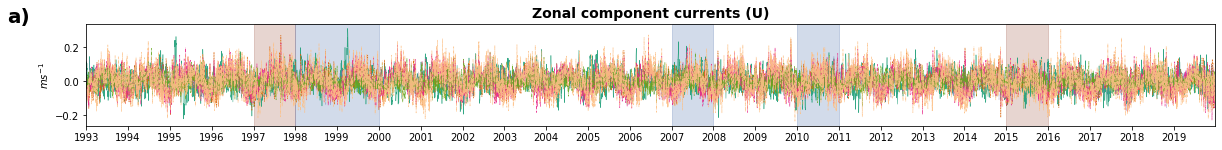

In [8]:
# Grafica final 
w=1;h=0.07
import string
import matplotlib.cm  as cm
import matplotlib.dates as mdates
#colors = plt.cm.Paired(np.linspace(0, 1, 9))
#colors=['red','orange','green', 'purple', 'red','brown','pink','orangered','olive']
colors=['#1b9e77','#d95f02','#7570b3','#e7298a','#66a61e','#e6ab02','#fdc086','#ffff99']
alpha=0.9
fig = plt.figure(figsize=(3.2*4.9,4.5*4.5))
#fig,ax = plt.subplots(figsize=(18,10),nrows=5, ncols=3) # tamaño de figura
ax= plt.axes([0,1.5,w,h])
ax.text(-0.07,1.01,string.ascii_lowercase[0]+')',fontsize=20, fontweight = 'bold', transform = ax.transAxes)
#NIño
ax.axvspan(np.datetime64('2015-01-01T00:00:00.000000000'), np.datetime64('2016-01-01T00:00:00.000000000'), alpha=0.2, color='#882D17') #Very Strong
ax.axvspan(np.datetime64('1997-01-01T00:00:00.000000000'), np.datetime64('1998-01-01T00:00:00.000000000'), alpha=0.2, color='#882D17') #Very strong
#NIña
ax.axvspan(np.datetime64('2010-01-01T00:00:00.000000000'), np.datetime64('2011-01-01T00:00:00.000000000'), alpha=0.2, color='#224C98') #Very Strong
ax.axvspan(np.datetime64('2007-01-01T00:00:00.000000000'), np.datetime64('2008-01-01T00:00:00.000000000'), alpha=0.2, color='#224C98') #Very Strong
ax.axvspan(np.datetime64('1998-01-01T00:00:00.000000000'), np.datetime64('2000-01-01T00:00:00.000000000'), alpha=0.2, color='#224C98') #Very Strong
ax.plot(UO.time,UO['Cap Frio'],c=colors[0],label='Cap Frio',linestyle='-',linewidth=0.5,alpha=alpha);ax.plot(UO.time,UO['Luderitz'],c=colors[1],label='Luderitz',linestyle='--',linewidth=0.5,alpha=alpha);
ax.plot(UO.time,UO['Walvis Bay'],c=colors[2],label='Walvis Bay',linestyle=':',linewidth=0.5,alpha=alpha);ax.plot(UO.time,UO['Namaqualand'],c=colors[3],label='Namaqualand',linestyle='-.',linewidth=0.5,alpha=alpha);
ax.plot(UO.time,UO['Saint Elena Bay'],c=colors[4],label='Saint Elena Bay',linestyle='-.',linewidth=0.5,alpha=alpha);
ax.plot(UO.time,UO['Cape Town'],c=colors[6],label='Cape Town',linestyle='-.',linewidth=0.5,alpha=alpha);
ax.set_ylabel(r'$m s^{-1}$')
ax.autoscale(enable=True, axis='x', tight=True)
ax.set_title('Zonal component currents (U)', fontweight='bold',fontsize=14)
ax.autoscale(enable=True, axis='x', tight=True);year = mdates.YearLocator(1,month=1,day=1)
year_fmt = mdates.DateFormatter('%Y');ax.xaxis.set_major_locator(year)
ax.xaxis.set_major_formatter(year_fmt);ax.minorticks_off()

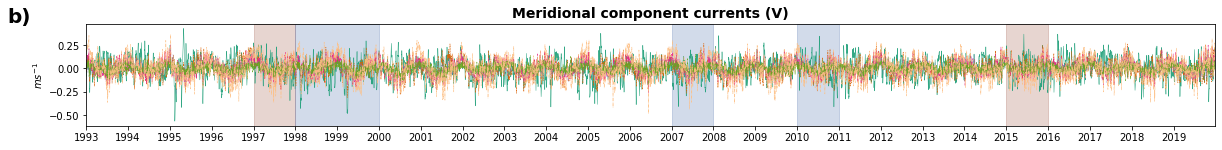

In [9]:
fig = plt.figure(figsize=(3.2*4.9,4.5*4.5))
ax = plt.axes([0,1.4,w,h])
ax.text(-0.07,1.01,string.ascii_lowercase[1]+')',fontsize=20, fontweight = 'bold', transform = ax.transAxes)
#ax[0,1].legend(ncol=9,fontsize='small',loc='upper center')
#Niño
ax.axvspan(np.datetime64('2015-01-01T00:00:00.000000000'), np.datetime64('2016-01-01T00:00:00.000000000'), alpha=0.2, color='#882D17') #Very Strong
ax.axvspan(np.datetime64('1997-01-01T00:00:00.000000000'), np.datetime64('1998-01-01T00:00:00.000000000'), alpha=0.2, color='#882D17') #Very strong
#NIña
ax.axvspan(np.datetime64('2010-01-01T00:00:00.000000000'), np.datetime64('2011-01-01T00:00:00.000000000'), alpha=0.2, color='#224C98') #Very Strong
ax.axvspan(np.datetime64('2007-01-01T00:00:00.000000000'), np.datetime64('2008-01-01T00:00:00.000000000'), alpha=0.2, color='#224C98') #Very Strong
ax.axvspan(np.datetime64('1998-01-01T00:00:00.000000000'), np.datetime64('2000-01-01T00:00:00.000000000'), alpha=0.2, color='#224C98') #Very Strong
ax.plot(VO.time,VO['Cap Frio'],c=colors[0],label='Cap Frio',linestyle='-',linewidth=0.5,alpha=alpha);ax.plot(VO.time,VO['Luderitz'],c=colors[1],label='Luderitz',linestyle='--',linewidth=0.5,alpha=alpha);
ax.plot(VO.time,VO['Walvis Bay'],c=colors[2],label='Walvis Bay',linestyle=':',linewidth=0.5,alpha=alpha);ax.plot(VO.time,VO['Namaqualand'],c=colors[3],label='Namaqualand',linestyle='-.',linewidth=0.5,alpha=alpha);
ax.plot(VO.time,VO['Saint Elena Bay'],c=colors[4],label='Saint Elena Bay',linestyle='-.',linewidth=0.5,alpha=alpha);
ax.plot(VO.time,VO['Cape Town'],c=colors[6],label='Cape Town',linestyle='-.',linewidth=0.5,alpha=alpha);
ax.set_ylabel(r'$m s^{-1}$')
ax.set_title('Meridional component currents (V)', fontweight='bold',fontsize=14)
ax.autoscale(enable=True, axis='x', tight=True);year = mdates.YearLocator(1,month=1,day=1)
year_fmt = mdates.DateFormatter('%Y');ax.xaxis.set_major_locator(year)
ax.xaxis.set_major_formatter(year_fmt);ax.minorticks_off()

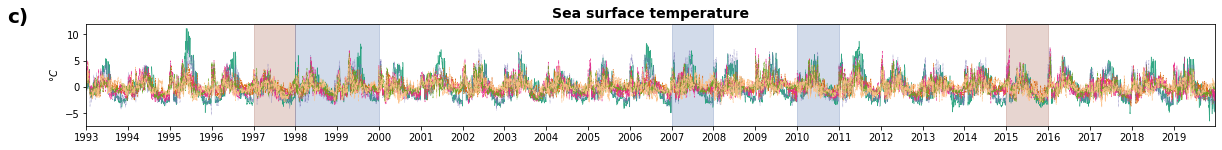

In [10]:
fig = plt.figure(figsize=(3.2*4.9,4.5*4.5))
ax = plt.axes([0,1.3,w,h])
ax.text(-0.07,1.01,string.ascii_lowercase[2]+')',fontsize=20, fontweight = 'bold', transform = ax.transAxes)
#ax[0,2].legend(ncol=9,fontsize='small',loc='upper center')
#Niño
ax.axvspan(np.datetime64('2015-01-01T00:00:00.000000000'), np.datetime64('2016-01-01T00:00:00.000000000'), alpha=0.2, color='#882D17') #Very Strong
ax.axvspan(np.datetime64('1997-01-01T00:00:00.000000000'), np.datetime64('1998-01-01T00:00:00.000000000'), alpha=0.2, color='#882D17') #Very strong
#NIña
ax.axvspan(np.datetime64('2010-01-01T00:00:00.000000000'), np.datetime64('2011-01-01T00:00:00.000000000'), alpha=0.2, color='#224C98') #Very Strong
ax.axvspan(np.datetime64('2007-01-01T00:00:00.000000000'), np.datetime64('2008-01-01T00:00:00.000000000'), alpha=0.2, color='#224C98') #Very Strong
ax.axvspan(np.datetime64('1998-01-01T00:00:00.000000000'), np.datetime64('2000-01-01T00:00:00.000000000'), alpha=0.2, color='#224C98') #Very Strong
ax.plot(SST.time,SST['Cap Frio'],c=colors[0],label='Cap Frio',linestyle='-',linewidth=0.5,alpha=alpha);ax.plot(SST.time,SST['Luderitz'],c=colors[1],label='Luderitz',linestyle='--',linewidth=0.5,alpha=alpha);
ax.plot(SST.time,SST['Walvis Bay'],c=colors[2],label='Walvis Bay',linestyle=':',linewidth=0.5,alpha=alpha);ax.plot(SST.time,SST['Namaqualand'],c=colors[3],label='Namaqualand',linestyle='-.',linewidth=0.5,alpha=alpha);
ax.plot(SST.time,SST['Saint Elena Bay'],c=colors[4],label='Saint Elena Bay',linestyle='-.',linewidth=0.5,alpha=alpha);
ax.plot(SST.time,SST['Cape Town'],c=colors[6],label='Cape Town',linestyle='-.',linewidth=0.5,alpha=alpha);
ax.set_ylabel(r'$°C$')
ax.set_title('Sea surface temperature', fontweight='bold',fontsize=14)
ax.autoscale(enable=True, axis='x', tight=True);year = mdates.YearLocator(1,month=1,day=1)
year_fmt = mdates.DateFormatter('%Y');ax.xaxis.set_major_locator(year)
ax.xaxis.set_major_formatter(year_fmt);ax.minorticks_off()

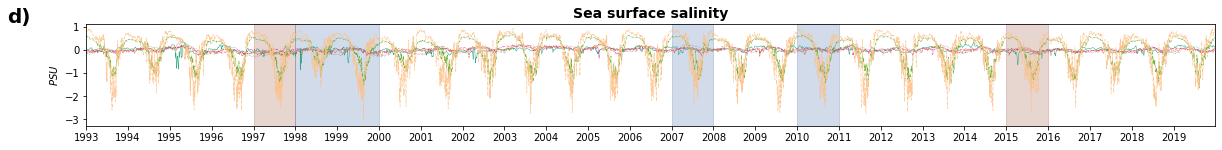

In [11]:
fig = plt.figure(figsize=(3.2*4.9,4.5*4.5))
ax = plt.axes([0,1.2,w,h])
ax.text(-0.07,1.01,string.ascii_lowercase[3]+')',fontsize=20, fontweight = 'bold', transform = ax.transAxes)
#ax[1,0].legend(ncol=9,fontsize='small',loc='upper center')
#Niño
ax.axvspan(np.datetime64('2015-01-01T00:00:00.000000000'), np.datetime64('2016-01-01T00:00:00.000000000'), alpha=0.2, color='#882D17') #Very Strong
ax.axvspan(np.datetime64('1997-01-01T00:00:00.000000000'), np.datetime64('1998-01-01T00:00:00.000000000'), alpha=0.2, color='#882D17') #Very strong
#NIña
ax.axvspan(np.datetime64('2010-01-01T00:00:00.000000000'), np.datetime64('2011-01-01T00:00:00.000000000'), alpha=0.2, color='#224C98') #Very Strong
ax.axvspan(np.datetime64('2007-01-01T00:00:00.000000000'), np.datetime64('2008-01-01T00:00:00.000000000'), alpha=0.2, color='#224C98') #Very Strong
ax.axvspan(np.datetime64('1998-01-01T00:00:00.000000000'), np.datetime64('2000-01-01T00:00:00.000000000'), alpha=0.2, color='#224C98') #Very Strong
ax.plot(S.time,S['Cap Frio'],c=colors[0],label='Cap Frio',linestyle='-',linewidth=0.5,alpha=alpha);ax.plot(S.time,S['Luderitz'],c=colors[1],label='Luderitz',linestyle='--',linewidth=0.5,alpha=alpha);
ax.plot(S.time,S['Walvis Bay'],c=colors[2],label='Walvis Bay',linestyle=':',linewidth=0.5,alpha=alpha);ax.plot(S.time,S['Namaqualand'],c=colors[3],label='Namaqualand',linestyle='-.',linewidth=0.5,alpha=alpha);
ax.plot(S.time,S['Saint Elena Bay'],c=colors[4],label='Saint Elena Bay',linestyle='-.',linewidth=0.5,alpha=alpha);
ax.plot(S.time,S['Cape Town'],c=colors[6],label='Cape Town',linestyle='-.',linewidth=0.5,alpha=alpha);
ax.set_ylabel(r'$PSU$')
ax.set_title('Sea surface salinity', fontweight='bold',fontsize=14)
ax.autoscale(enable=True, axis='x', tight=True);year = mdates.YearLocator(1,month=1,day=1)
year_fmt = mdates.DateFormatter('%Y');ax.xaxis.set_major_locator(year)
ax.xaxis.set_major_formatter(year_fmt);ax.minorticks_off()

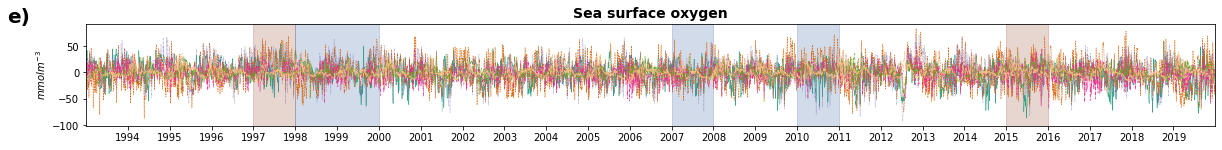

In [12]:
fig = plt.figure(figsize=(3.2*4.9,4.5*4.5))
ax = plt.axes([0,1.1,w,h])
ax.text(-0.07,1.01,string.ascii_lowercase[4]+')',fontsize=20, fontweight = 'bold', transform = ax.transAxes)
#ax].legend(ncol=9,fontsize='small',loc='upper center')
#Niño
ax.axvspan(np.datetime64('2015-01-01T00:00:00.000000000'), np.datetime64('2016-01-01T00:00:00.000000000'), alpha=0.2, color='#882D17') #Very Strong
ax.axvspan(np.datetime64('1997-01-01T00:00:00.000000000'), np.datetime64('1998-01-01T00:00:00.000000000'), alpha=0.2, color='#882D17') #Very strong
#NIña
ax.axvspan(np.datetime64('2010-01-01T00:00:00.000000000'), np.datetime64('2011-01-01T00:00:00.000000000'), alpha=0.2, color='#224C98') #Very Strong
ax.axvspan(np.datetime64('2007-01-01T00:00:00.000000000'), np.datetime64('2008-01-01T00:00:00.000000000'), alpha=0.2, color='#224C98') #Very Strong
ax.axvspan(np.datetime64('1998-01-01T00:00:00.000000000'), np.datetime64('2000-01-01T00:00:00.000000000'), alpha=0.2, color='#224C98') #Very Strong
ax.plot(O.time,O['Cap Frio'],c=colors[0],label='Cap Frio',linestyle='-',linewidth=0.5,alpha=alpha);ax.plot(O.time,O['Luderitz'],c=colors[1],label='Luderitz',linestyle='--',linewidth=0.5,alpha=alpha);
ax.plot(O.time,O['Walvis Bay'],c=colors[2],label='Walvis Bay',linestyle=':',linewidth=0.5,alpha=alpha);ax.plot(O.time,O['Namaqualand'],c=colors[3],label='Namaqualand',linestyle='-.',linewidth=0.5,alpha=alpha);
ax.plot(O.time,O['Saint Elena Bay'],c=colors[4],label='Saint Elena Bay',linestyle='-.',linewidth=0.5,alpha=alpha);
ax.plot(O.time,O['Cape Town'],c=colors[6],label='Cape Town',linestyle='-.',linewidth=0.5,alpha=alpha);
ax.set_ylabel(r'$mmol m^{-3}$')
ax.set_title('Sea surface oxygen', fontweight='bold',fontsize=14)
ax.autoscale(enable=True, axis='x', tight=True);year = mdates.YearLocator(1,month=1,day=1)
year_fmt = mdates.DateFormatter('%Y');ax.xaxis.set_major_locator(year)
ax.xaxis.set_major_formatter(year_fmt);ax.minorticks_off()


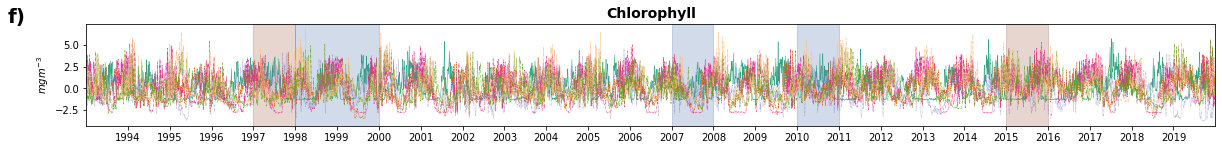

In [13]:
fig = plt.figure(figsize=(3.2*4.9,4.5*4.5))
ax = plt.axes([0,1.0,w,h])
ax.text(-0.07,1.01,string.ascii_lowercase[5]+')',fontsize=20, fontweight = 'bold', transform = ax.transAxes)
#ax.legend(ncol=9,fontsize='small',loc='upper center')
#Niño
ax.axvspan(np.datetime64('2015-01-01T00:00:00.000000000'), np.datetime64('2016-01-01T00:00:00.000000000'), alpha=0.2, color='#882D17') #Very Strong
ax.axvspan(np.datetime64('1997-01-01T00:00:00.000000000'), np.datetime64('1998-01-01T00:00:00.000000000'), alpha=0.2, color='#882D17') #Very strong
#NIña
ax.axvspan(np.datetime64('2010-01-01T00:00:00.000000000'), np.datetime64('2011-01-01T00:00:00.000000000'), alpha=0.2, color='#224C98') #Very Strong
ax.axvspan(np.datetime64('2007-01-01T00:00:00.000000000'), np.datetime64('2008-01-01T00:00:00.000000000'), alpha=0.2, color='#224C98') #Very Strong
ax.axvspan(np.datetime64('1998-01-01T00:00:00.000000000'), np.datetime64('2000-01-01T00:00:00.000000000'), alpha=0.2, color='#224C98') #Very Strong
ax.plot(CHL.time,CHL['Cap Frio'],c=colors[0],label='Cap Frio',linestyle='-',linewidth=0.5,alpha=alpha);ax.plot(CHL.time,CHL['Luderitz'],c=colors[1],label='Luderitz',linestyle='--',linewidth=0.5,alpha=alpha);
ax.plot(CHL.time,CHL['Walvis Bay'],c=colors[2],label='Walvis Bay',linestyle=':',linewidth=0.5,alpha=alpha);ax.plot(CHL.time,CHL['Namaqualand'],c=colors[3],label='Namaqualand',linestyle='-.',linewidth=0.5,alpha=alpha);
ax.plot(CHL.time,CHL['Saint Elena Bay'],c=colors[4],label='Saint Elena Bay',linestyle='-.',linewidth=0.5,alpha=alpha);
ax.plot(CHL.time,CHL['Cape Town'],c=colors[6],label='Cape Town',linestyle='-.',linewidth=0.5,alpha=alpha);
ax.set_ylabel(r'$mg m^{-3}$')
ax.set_title('Chlorophyll', fontweight='bold',fontsize=14)
ax.autoscale(enable=True, axis='x', tight=True);year = mdates.YearLocator(1,month=1,day=1)
year_fmt = mdates.DateFormatter('%Y');ax.xaxis.set_major_locator(year)
ax.xaxis.set_major_formatter(year_fmt);ax.minorticks_off()

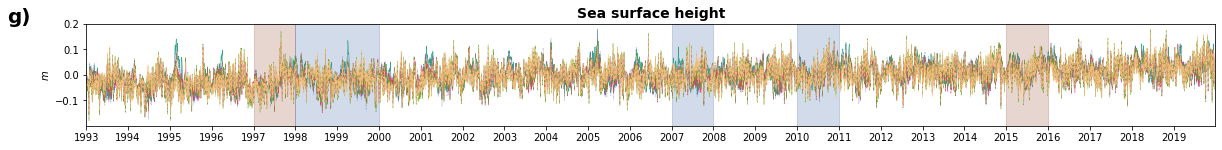

In [14]:
fig = plt.figure(figsize=(3.2*4.9,4.5*4.5))
ax = plt.axes([0,0.9,w,h])
ax.text(-0.07,1.01,string.ascii_lowercase[6]+')',fontsize=20, fontweight = 'bold', transform = ax.transAxes)
#ax.legend(ncol=9,fontsize='small',loc='upper center')
#Niño
ax.axvspan(np.datetime64('2015-01-01T00:00:00.000000000'), np.datetime64('2016-01-01T00:00:00.000000000'), alpha=0.2, color='#882D17') #Very Strong
ax.axvspan(np.datetime64('1997-01-01T00:00:00.000000000'), np.datetime64('1998-01-01T00:00:00.000000000'), alpha=0.2, color='#882D17') #Very strong
#NIña
ax.axvspan(np.datetime64('2010-01-01T00:00:00.000000000'), np.datetime64('2011-01-01T00:00:00.000000000'), alpha=0.2, color='#224C98') #Very Strong
ax.axvspan(np.datetime64('2007-01-01T00:00:00.000000000'), np.datetime64('2008-01-01T00:00:00.000000000'), alpha=0.2, color='#224C98') #Very Strong
ax.axvspan(np.datetime64('1998-01-01T00:00:00.000000000'), np.datetime64('2000-01-01T00:00:00.000000000'), alpha=0.2, color='#224C98') #Very Strong
ax.plot(SSH.time,SSH['Cap Frio'],c=colors[0],label='Cap Frio',linestyle='-',linewidth=0.5,alpha=alpha);ax.plot(SSH.time,SSH['Luderitz'],c=colors[1],label='Luderitz',linestyle='--',linewidth=0.5,alpha=alpha);
ax.plot(SSH.time,SSH['Walvis Bay'],c=colors[2],label='Walvis Bay',linestyle=':',linewidth=0.5,alpha=alpha);ax.plot(SSH.time,SSH['Namaqualand'],c=colors[3],label='Namaqualand',linestyle='-.',linewidth=0.5,alpha=alpha);
ax.plot(SSH.time,SSH['Saint Elena Bay'],c=colors[4],label='Saint Elena Bay',linestyle='-.',linewidth=0.5,alpha=alpha);
ax.plot(SSH.time,SSH['Cape Town'],c=colors[6],label='Cape Town',linestyle='-.',linewidth=0.5,alpha=alpha);
ax.set_ylabel(r'$m$')
ax.set_title('Sea surface height', fontweight='bold',fontsize=14)
ax.autoscale(enable=True, axis='x', tight=True);year = mdates.YearLocator(1,month=1,day=1)
year_fmt = mdates.DateFormatter('%Y');ax.xaxis.set_major_locator(year)
ax.xaxis.set_major_formatter(year_fmt);ax.minorticks_off()

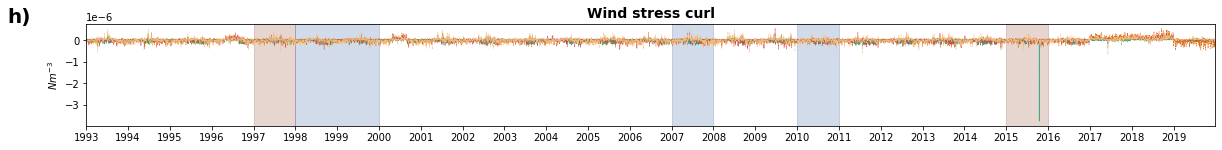

In [15]:
fig = plt.figure(figsize=(3.2*4.9,4.5*4.5))
ax = plt.axes([0,0.8,w,h])
ax.text(-0.07,1.01,string.ascii_lowercase[7]+')',fontsize=20, fontweight = 'bold', transform = ax.transAxes)
#ax.legend(ncol=9,fontsize='small',loc='upper center')
#Niño
ax.axvspan(np.datetime64('2015-01-01T00:00:00.000000000'), np.datetime64('2016-01-01T00:00:00.000000000'), alpha=0.2, color='#882D17') #Very Strong
ax.axvspan(np.datetime64('1997-01-01T00:00:00.000000000'), np.datetime64('1998-01-01T00:00:00.000000000'), alpha=0.2, color='#882D17') #Very strong
#NIña
ax.axvspan(np.datetime64('2010-01-01T00:00:00.000000000'), np.datetime64('2011-01-01T00:00:00.000000000'), alpha=0.2, color='#224C98') #Very Strong
ax.axvspan(np.datetime64('2007-01-01T00:00:00.000000000'), np.datetime64('2008-01-01T00:00:00.000000000'), alpha=0.2, color='#224C98') #Very Strong
ax.axvspan(np.datetime64('1998-01-01T00:00:00.000000000'), np.datetime64('2000-01-01T00:00:00.000000000'), alpha=0.2, color='#224C98') #Very Strong
ax.plot(Rotor.time,Rotor['Cap Frio'],c=colors[0],label='Cap Frio',linestyle='-',linewidth=0.5,alpha=alpha);ax.plot(Rotor.time,Rotor['Luderitz'],c=colors[1],label='Luderitz',linestyle='--',linewidth=0.5,alpha=alpha);
ax.plot(Rotor.time,Rotor['Walvis Bay'],c=colors[2],label='Walvis Bay',linestyle=':',linewidth=0.5,alpha=alpha);ax.plot(Rotor.time,Rotor['Namaqualand'],c=colors[3],label='Namaqualand',linestyle='-.',linewidth=0.5,alpha=alpha);
ax.plot(Rotor.time,Rotor['Saint Elena Bay'],c=colors[4],label='Saint Elena Bay',linestyle='-.',linewidth=0.5,alpha=alpha);
ax.plot(Rotor.time,Rotor['Cape Town'],c=colors[6],label='Cape Town',linestyle='-.',linewidth=0.5,alpha=alpha);
ax.set_ylabel(r'$N m^{-3}$')
ax.set_title('Wind stress curl', fontweight='bold',fontsize=14)
ax.autoscale(enable=True, axis='x', tight=True);year = mdates.YearLocator(1,month=1,day=1)
year_fmt = mdates.DateFormatter('%Y');ax.xaxis.set_major_locator(year)
ax.xaxis.set_major_formatter(year_fmt);ax.minorticks_off()

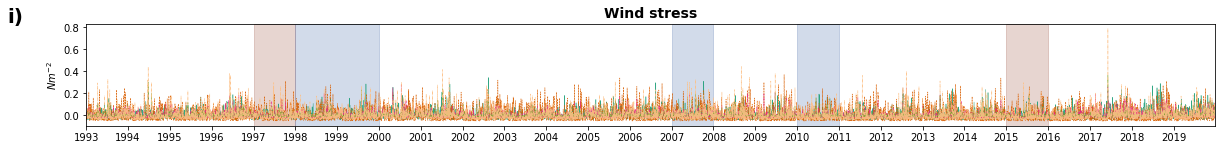

In [16]:
fig = plt.figure(figsize=(3.2*4.9,4.5*4.5))
ax = plt.axes([0,0.7,w,h])
ax.text(-0.07,1.01,string.ascii_lowercase[8]+')',fontsize=20, fontweight = 'bold', transform = ax.transAxes)
#ax.legend(ncol=9,fontsize='small',loc='upper center')
#Niño
ax.axvspan(np.datetime64('2015-01-01T00:00:00.000000000'), np.datetime64('2016-01-01T00:00:00.000000000'), alpha=0.2, color='#882D17') #Very Strong
ax.axvspan(np.datetime64('1997-01-01T00:00:00.000000000'), np.datetime64('1998-01-01T00:00:00.000000000'), alpha=0.2, color='#882D17') #Very strong
#NIña
ax.axvspan(np.datetime64('2010-01-01T00:00:00.000000000'), np.datetime64('2011-01-01T00:00:00.000000000'), alpha=0.2, color='#224C98') #Very Strong
ax.axvspan(np.datetime64('2007-01-01T00:00:00.000000000'), np.datetime64('2008-01-01T00:00:00.000000000'), alpha=0.2, color='#224C98') #Very Strong
ax.axvspan(np.datetime64('1998-01-01T00:00:00.000000000'), np.datetime64('2000-01-01T00:00:00.000000000'), alpha=0.2, color='#224C98') #Very Strong
ax.plot(Estres.time,Estres['Cap Frio'],c=colors[0],label='Cap Frio',linestyle='-',linewidth=0.5,alpha=alpha);ax.plot(Estres.time,Estres['Luderitz'],c=colors[1],label='Luderitz',linestyle='--',linewidth=0.5,alpha=alpha);
ax.plot(Estres.time,Estres['Walvis Bay'],c=colors[2],label='Walvis Bay',linestyle=':',linewidth=0.5,alpha=alpha);ax.plot(Estres.time,Estres['Namaqualand'],c=colors[3],label='Namaqualand',linestyle='-.',linewidth=0.5,alpha=alpha);
ax.plot(Estres.time,Estres['Saint Elena Bay'],c=colors[4],label='Saint Elena Bay',linestyle='-.',linewidth=0.5,alpha=alpha);
ax.plot(Estres.time,Estres['Cape Town'],c=colors[6],label='Cape Town',linestyle='-.',linewidth=0.5,alpha=alpha);
ax.set_ylabel(r'$N m^{-2}$')
ax.set_title('Wind stress', fontweight='bold',fontsize=14)
ax.autoscale(enable=True, axis='x', tight=True);year = mdates.YearLocator(1,month=1,day=1)
year_fmt = mdates.DateFormatter('%Y');ax.xaxis.set_major_locator(year)
ax.xaxis.set_major_formatter(year_fmt);ax.minorticks_off()

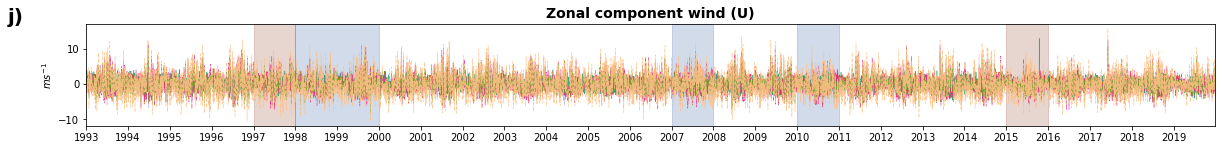

In [17]:
fig = plt.figure(figsize=(3.2*4.9,4.5*4.5))
ax = plt.axes([0,0.6,w,h])
ax.text(-0.07,1.01,string.ascii_lowercase[9]+')',fontsize=20, fontweight = 'bold', transform = ax.transAxes)
#ax.legend(ncol=9,fontsize='small',loc='upper center')
#Niño
ax.axvspan(np.datetime64('2015-01-01T00:00:00.000000000'), np.datetime64('2016-01-01T00:00:00.000000000'), alpha=0.2, color='#882D17') #Very Strong
ax.axvspan(np.datetime64('1997-01-01T00:00:00.000000000'), np.datetime64('1998-01-01T00:00:00.000000000'), alpha=0.2, color='#882D17') #Very strong
#NIña
ax.axvspan(np.datetime64('2010-01-01T00:00:00.000000000'), np.datetime64('2011-01-01T00:00:00.000000000'), alpha=0.2, color='#224C98') #Very Strong
ax.axvspan(np.datetime64('2007-01-01T00:00:00.000000000'), np.datetime64('2008-01-01T00:00:00.000000000'), alpha=0.2, color='#224C98') #Very Strong
ax.axvspan(np.datetime64('1998-01-01T00:00:00.000000000'), np.datetime64('2000-01-01T00:00:00.000000000'), alpha=0.2, color='#224C98') #Very Strong
ax.plot(U.time,U['Cap Frio'],c=colors[0],label='Cap Frio',linestyle='-',linewidth=0.5,alpha=alpha);ax.plot(U.time,U['Luderitz'],c=colors[1],label='Luderitz',linestyle='--',linewidth=0.5,alpha=alpha);
ax.plot(U.time,U['Walvis Bay'],c=colors[2],label='Walvis Bay',linestyle=':',linewidth=0.5,alpha=alpha);ax.plot(U.time,U['Namaqualand'],c=colors[3],label='Namaqualand',linestyle='-.',linewidth=0.5,alpha=alpha);
ax.plot(U.time,U['Saint Elena Bay'],c=colors[4],label='Saint Elena Bay',linestyle='-.',linewidth=0.5,alpha=alpha);
ax.plot(U.time,U['Cape Town'],c=colors[6],label='Cape Town',linestyle='-.',linewidth=0.5,alpha=alpha);
ax.set_ylabel(r'$m s^{-1}$')
ax.set_title('Zonal component wind (U)', fontweight='bold',fontsize=14)
ax.autoscale(enable=True, axis='x', tight=True);year = mdates.YearLocator(1,month=1,day=1)
year_fmt = mdates.DateFormatter('%Y');ax.xaxis.set_major_locator(year)
ax.xaxis.set_major_formatter(year_fmt);ax.minorticks_off()

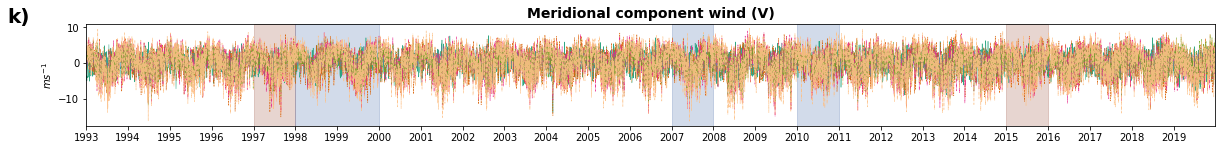

In [18]:
fig = plt.figure(figsize=(3.2*4.9,4.5*4.5))
ax = plt.axes([0,0.5,w,h])
ax.text(-0.07,1.01,string.ascii_lowercase[10]+')',fontsize=20, fontweight = 'bold', transform = ax.transAxes)
#ax.legend(ncol=9,fontsize='small',loc='upper center')
#Niño
ax.axvspan(np.datetime64('2015-01-01T00:00:00.000000000'), np.datetime64('2016-01-01T00:00:00.000000000'), alpha=0.2, color='#882D17') #Very Strong
ax.axvspan(np.datetime64('1997-01-01T00:00:00.000000000'), np.datetime64('1998-01-01T00:00:00.000000000'), alpha=0.2, color='#882D17') #Very strong
#NIña
ax.axvspan(np.datetime64('2010-01-01T00:00:00.000000000'), np.datetime64('2011-01-01T00:00:00.000000000'), alpha=0.2, color='#224C98') #Very Strong
ax.axvspan(np.datetime64('2007-01-01T00:00:00.000000000'), np.datetime64('2008-01-01T00:00:00.000000000'), alpha=0.2, color='#224C98') #Very Strong
ax.axvspan(np.datetime64('1998-01-01T00:00:00.000000000'), np.datetime64('2000-01-01T00:00:00.000000000'), alpha=0.2, color='#224C98') #Very Strong
ax.plot(V.time,V['Cap Frio'],c=colors[0],label='Cap Frio',linestyle='-',linewidth=0.5,alpha=alpha);ax.plot(V.time,V['Luderitz'],c=colors[1],label='Luderitz',linestyle='--',linewidth=0.5,alpha=alpha);
ax.plot(V.time,V['Walvis Bay'],c=colors[2],label='Walvis Bay',linestyle=':',linewidth=0.5,alpha=alpha);ax.plot(V.time,V['Namaqualand'],c=colors[3],label='Namaqualand',linestyle='-.',linewidth=0.5,alpha=alpha);
ax.plot(V.time,V['Saint Elena Bay'],c=colors[4],label='Saint Elena Bay',linestyle='-.',linewidth=0.5,alpha=alpha);
ax.plot(V.time,V['Cape Town'],c=colors[6],label='Cape Town',linestyle='-.',linewidth=0.5,alpha=alpha);
ax.set_ylabel(r'$m s^{-1}$')
ax.set_title('Meridional component wind (V)', fontweight='bold',fontsize=14)
ax.autoscale(enable=True, axis='x', tight=True);year = mdates.YearLocator(1,month=1,day=1)
year_fmt = mdates.DateFormatter('%Y');ax.xaxis.set_major_locator(year)
ax.xaxis.set_major_formatter(year_fmt);ax.minorticks_off()

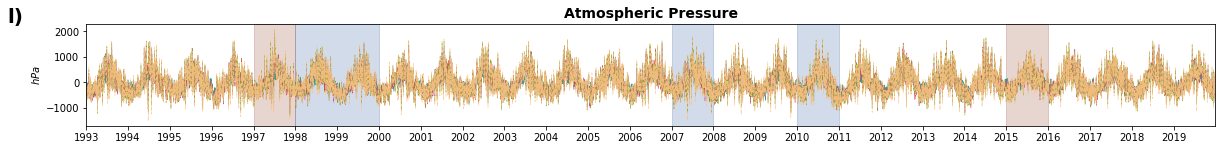

In [19]:
fig = plt.figure(figsize=(3.2*4.9,4.5*4.5))
ax = plt.axes([0,0.4,w,h])
ax.text(-0.07,1.01,string.ascii_lowercase[11]+')',fontsize=20, fontweight = 'bold', transform = ax.transAxes)
#ax.legend(ncol=9,fontsize='small',loc='upper center')
#Niño
ax.axvspan(np.datetime64('2015-01-01T00:00:00.000000000'), np.datetime64('2016-01-01T00:00:00.000000000'), alpha=0.2, color='#882D17') #Very Strong
ax.axvspan(np.datetime64('1997-01-01T00:00:00.000000000'), np.datetime64('1998-01-01T00:00:00.000000000'), alpha=0.2, color='#882D17') #Very strong
#NIña
ax.axvspan(np.datetime64('2010-01-01T00:00:00.000000000'), np.datetime64('2011-01-01T00:00:00.000000000'), alpha=0.2, color='#224C98') #Very Strong
ax.axvspan(np.datetime64('2007-01-01T00:00:00.000000000'), np.datetime64('2008-01-01T00:00:00.000000000'), alpha=0.2, color='#224C98') #Very Strong
ax.axvspan(np.datetime64('1998-01-01T00:00:00.000000000'), np.datetime64('2000-01-01T00:00:00.000000000'), alpha=0.2, color='#224C98') #Very Strong
ax.plot(P.time,P['Cap Frio'],c=colors[0],label='Cap Frio',linestyle='-',linewidth=0.5,alpha=alpha);ax.plot(P.time,P['Luderitz'],c=colors[1],label='Luderitz',linestyle='--',linewidth=0.5,alpha=alpha);
ax.plot(P.time,P['Walvis Bay'],c=colors[2],label='Walvis Bay',linestyle=':',linewidth=0.5,alpha=alpha);ax.plot(P.time,P['Namaqualand'],c=colors[3],label='Namaqualand',linestyle='-.',linewidth=0.5,alpha=alpha);
ax.plot(P.time,P['Saint Elena Bay'],c=colors[4],label='Saint Elena Bay',linestyle='-.',linewidth=0.5,alpha=alpha);
ax.plot(P.time,P['Cape Town'],c=colors[6],label='Cape Town',linestyle='-.',linewidth=0.5,alpha=alpha);
ax.set_ylabel(r'$hPa$')
ax.set_title('Atmospheric Pressure', fontweight='bold',fontsize=14)
ax.autoscale(enable=True, axis='x', tight=True);year = mdates.YearLocator(1,month=1,day=1)
year_fmt = mdates.DateFormatter('%Y');ax.xaxis.set_major_locator(year)
ax.xaxis.set_major_formatter(year_fmt);ax.minorticks_off()

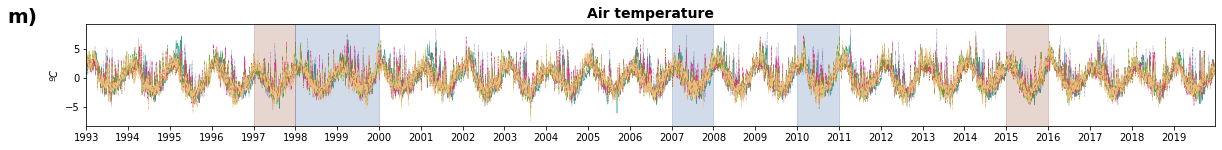

In [20]:
fig = plt.figure(figsize=(3.2*4.9,4.5*4.5))
ax = plt.axes([0,0.3,w,h])
ax.text(-0.07,1.01,string.ascii_lowercase[12]+')',fontsize=20, fontweight = 'bold', transform = ax.transAxes)
#ax.legend(ncol=9,fontsize='small',loc='upper center')
#Niño
ax.axvspan(np.datetime64('2015-01-01T00:00:00.000000000'), np.datetime64('2016-01-01T00:00:00.000000000'), alpha=0.2, color='#882D17') #Very Strong
ax.axvspan(np.datetime64('1997-01-01T00:00:00.000000000'), np.datetime64('1998-01-01T00:00:00.000000000'), alpha=0.2, color='#882D17') #Very strong
#NIña
ax.axvspan(np.datetime64('2010-01-01T00:00:00.000000000'), np.datetime64('2011-01-01T00:00:00.000000000'), alpha=0.2, color='#224C98') #Very Strong
ax.axvspan(np.datetime64('2007-01-01T00:00:00.000000000'), np.datetime64('2008-01-01T00:00:00.000000000'), alpha=0.2, color='#224C98') #Very Strong
ax.axvspan(np.datetime64('1998-01-01T00:00:00.000000000'), np.datetime64('2000-01-01T00:00:00.000000000'), alpha=0.2, color='#224C98') #Very Strong
ax.plot(T.time,T['Cap Frio'],c=colors[0],label='Cap Frio',linestyle='-',linewidth=0.5,alpha=alpha);ax.plot(T.time,T['Luderitz'],c=colors[1],label='Luderitz',linestyle='--',linewidth=0.5,alpha=alpha);
ax.plot(T.time,T['Walvis Bay'],c=colors[2],label='Walvis Bay',linestyle=':',linewidth=0.5,alpha=alpha);ax.plot(T.time,T['Namaqualand'],c=colors[3],label='Namaqualand',linestyle='-.',linewidth=0.5,alpha=alpha);
ax.plot(T.time,T['Saint Elena Bay'],c=colors[4],label='Saint Elena Bay',linestyle='-.',linewidth=0.5,alpha=alpha);
ax.plot(T.time,T['Cape Town'],c=colors[6],label='Cape Town',linestyle='-.',linewidth=0.5,alpha=alpha);
ax.set_ylabel(r'$º C$')
ax.set_title('Air temperature', fontweight='bold',fontsize=14)
ax.autoscale(enable=True, axis='x', tight=True);year = mdates.YearLocator(1,month=1,day=1)
year_fmt = mdates.DateFormatter('%Y');ax.xaxis.set_major_locator(year)
ax.xaxis.set_major_formatter(year_fmt);ax.minorticks_off()

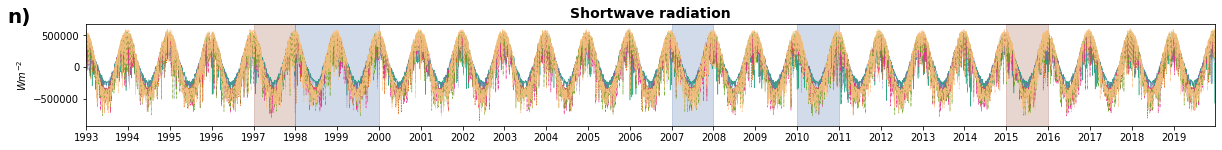

In [21]:
fig = plt.figure(figsize=(3.2*4.9,4.5*4.5))
ax = plt.axes([0,0.2,w,h])
ax.text(-0.07,1.01,string.ascii_lowercase[13]+')',fontsize=20, fontweight = 'bold', transform = ax.transAxes)
#ax.legend(ncol=9,fontsize='small',loc='upper center')
#Niño
ax.axvspan(np.datetime64('2015-01-01T00:00:00.000000000'), np.datetime64('2016-01-01T00:00:00.000000000'), alpha=0.2, color='#882D17') #Very Strong
ax.axvspan(np.datetime64('1997-01-01T00:00:00.000000000'), np.datetime64('1998-01-01T00:00:00.000000000'), alpha=0.2, color='#882D17') #Very strong
#NIña
ax.axvspan(np.datetime64('2010-01-01T00:00:00.000000000'), np.datetime64('2011-01-01T00:00:00.000000000'), alpha=0.2, color='#224C98') #Very Strong
ax.axvspan(np.datetime64('2007-01-01T00:00:00.000000000'), np.datetime64('2008-01-01T00:00:00.000000000'), alpha=0.2, color='#224C98') #Very Strong
ax.axvspan(np.datetime64('1998-01-01T00:00:00.000000000'), np.datetime64('2000-01-01T00:00:00.000000000'), alpha=0.2, color='#224C98') #Very Strong
ax.plot(Q.time,Q['Cap Frio'],c=colors[0],label='Cap Frio',linestyle='-',linewidth=0.5,alpha=alpha);ax.plot(Q.time,Q['Luderitz'],c=colors[1],label='Luderitz',linestyle='--',linewidth=0.5,alpha=alpha);
ax.plot(Q.time,Q['Walvis Bay'],c=colors[2],label='Walvis Bay',linestyle=':',linewidth=0.5,alpha=alpha);ax.plot(Q.time,Q['Namaqualand'],c=colors[3],label='Namaqualand',linestyle='-.',linewidth=0.5,alpha=alpha);
ax.plot(Q.time,Q['Saint Elena Bay'],c=colors[4],label='Saint Elena Bay',linestyle='-.',linewidth=0.5,alpha=alpha);
ax.plot(Q.time,Q['Cape Town'],c=colors[6],label='Cape Town',linestyle='-.',linewidth=0.5,alpha=alpha);
ax.set_ylabel(r'$Wm^{-2}$')
ax.set_title('Shortwave radiation', fontweight='bold',fontsize=14)
ax.autoscale(enable=True, axis='x', tight=True);year = mdates.YearLocator(1,month=1,day=1)
year_fmt = mdates.DateFormatter('%Y');ax.xaxis.set_major_locator(year)
ax.xaxis.set_major_formatter(year_fmt);ax.minorticks_off()

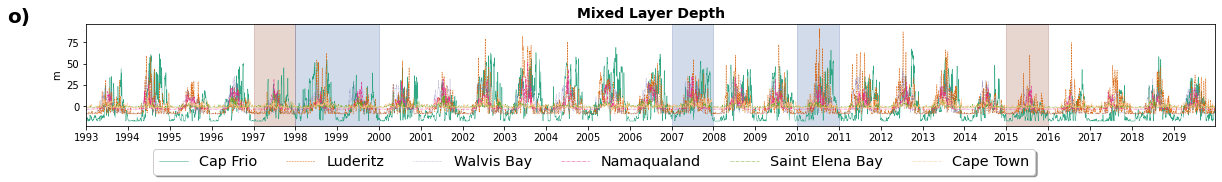

In [22]:
fig = plt.figure(figsize=(3.2*4.9,4.5*4.5))
ax = plt.axes([0,0.1,w,h])
ax.text(-0.07,1.01,string.ascii_lowercase[14]+')',fontsize=20, fontweight = 'bold', transform = ax.transAxes)
#ax.legend(ncol=9,fontsize='small',loc='upper center')
#Niño
ax.axvspan(np.datetime64('2015-01-01T00:00:00.000000000'), np.datetime64('2016-01-01T00:00:00.000000000'), alpha=0.2, color='#882D17') #Very Strong
ax.axvspan(np.datetime64('1997-01-01T00:00:00.000000000'), np.datetime64('1998-01-01T00:00:00.000000000'), alpha=0.2, color='#882D17') #Very strong
#NIña
ax.axvspan(np.datetime64('2010-01-01T00:00:00.000000000'), np.datetime64('2011-01-01T00:00:00.000000000'), alpha=0.2, color='#224C98') #Very Strong
ax.axvspan(np.datetime64('2007-01-01T00:00:00.000000000'), np.datetime64('2008-01-01T00:00:00.000000000'), alpha=0.2, color='#224C98') #Very Strong
ax.axvspan(np.datetime64('1998-01-01T00:00:00.000000000'), np.datetime64('2000-01-01T00:00:00.000000000'), alpha=0.2, color='#224C98') #Very Strong
ax.plot(MLD.time,MLD['Cap Frio'],c=colors[0],label='Cap Frio',linestyle='-',linewidth=0.5,alpha=alpha);ax.plot(MLD.time,MLD['Luderitz'],c=colors[1],label='Luderitz',linestyle='--',linewidth=0.5,alpha=alpha);
ax.plot(MLD.time,MLD['Walvis Bay'],c=colors[2],label='Walvis Bay',linestyle=':',linewidth=0.5,alpha=alpha);ax.plot(MLD.time,MLD['Namaqualand'],c=colors[3],label='Namaqualand',linestyle='-.',linewidth=0.5,alpha=alpha);
ax.plot(MLD.time,MLD['Saint Elena Bay'],c=colors[4],label='Saint Elena Bay',linestyle='-.',linewidth=0.5,alpha=alpha);
ax.plot(MLD.time,MLD['Cape Town'],c=colors[6],label='Cape Town',linestyle='-.',linewidth=0.5,alpha=alpha);
ax.set_ylabel(r'm')
ax.set_title('Mixed Layer Depth', fontweight='bold',fontsize=14)
ax.autoscale(enable=True, axis='x', tight=True);year = mdates.YearLocator(1,month=1,day=1)
year_fmt = mdates.DateFormatter('%Y');ax.xaxis.set_major_locator(year)
ax.xaxis.set_major_formatter(year_fmt);ax.minorticks_off()

ax.legend(loc='lower center', bbox_to_anchor=(0.45, -0.55),ncol=9, fancybox=True, shadow=True,fontsize="x-large")

In [23]:
# Tendencias
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
# Valores de x
def createList(r1, r2): 
    return [item for item in range(r1, r2+1)] 
# TENDENCIAS POR DECADA!!!!!!!!!!!!
# UO
print('-------------------- UO --------------------------')
r1, r2 = UO.index[0], UO.index[-1]
x = np.array(createList(r1, r2)).reshape((-1, 1))
y = np.array(UO['Cap Frio'])
results = sm.OLS(y,sm.add_constant(x)).fit()
print('1993-2019 Cap Frio :', results.params[1]*365*10, ' Error estandar:', results.bse[1]*365*10) # Significativa
y = np.array(UO['Luderitz'])
results = sm.OLS(y,sm.add_constant(x)).fit()
print('1993-2019 Luderitz :', results.params[1]*365*10, ' Error estandar:', results.bse[1]*365*10) 
y = np.array(UO['Walvis Bay'])
results = sm.OLS(y,sm.add_constant(x)).fit()
print('1993-2019 Walvis Bay :', results.params[1]*365*10, ' Error estandar:', results.bse[1]*365*10) # Significativa
y = np.array(UO['Namaqualand'])
results = sm.OLS(y,sm.add_constant(x)).fit()
print('1993-2019 Namaqualand :', results.params[1]*365*10, ' Error estandar:', results.bse[1]*365*10) # Significativa
y = np.array(UO['Saint Elena Bay'])
results = sm.OLS(y,sm.add_constant(x)).fit()
print('1993-2019 Saint Elena Bay :', results.params[1]*365*10, ' Error estandar:', results.bse[1]*365*10) 
y = np.array(UO['Cape Town'])
results = sm.OLS(y,sm.add_constant(x)).fit()
print('1993-2019 Cape Town :', results.params[1]*365*10, ' Error estandar:', results.bse[1]*365*10) # Significativa
# VO
print('-------------------- VO --------------------------')
r1, r2 = VO.index[0], VO.index[-1]
x = np.array(createList(r1, r2)).reshape((-1, 1))
y = np.array(VO['Cap Frio'])
results = sm.OLS(y,sm.add_constant(x)).fit()
print('1993-2019 Cap Frio :', results.params[1]*365*10, ' Error estandar:', results.bse[1]*365*10) # Significativa
y = np.array(VO['Luderitz'])
results = sm.OLS(y,sm.add_constant(x)).fit()
print('1993-2019 Luderitz :', results.params[1]*365*10, ' Error estandar:', results.bse[1]*365*10) # Significativa
y = np.array(VO['Walvis Bay'])
results = sm.OLS(y,sm.add_constant(x)).fit()
print('1993-2019 Walvis Bay :', results.params[1]*365*10, ' Error estandar:', results.bse[1]*365*10)  # Significativa
y = np.array(VO['Namaqualand'])
results = sm.OLS(y,sm.add_constant(x)).fit()
print('1993-2019 Namaqualand :', results.params[1]*365*10, ' Error estandar:', results.bse[1]*365*10) # Significativa
y = np.array(VO['Saint Elena Bay'])
results = sm.OLS(y,sm.add_constant(x)).fit()
print('1993-2019 Saint Elena Bay :', results.params[1]*365*10, ' Error estandar:', results.bse[1]*365*10) # Significativa
y = np.array(VO['Cape Town'])
results = sm.OLS(y,sm.add_constant(x)).fit()
print('1993-2019 Cape Town :', results.params[1]*365*10, ' Error estandar:', results.bse[1]*365*10) # Significativa
# SST
print('-------------------- SST --------------------------')
r1, r2 = SST.index[0], SST.index[-1]
x = np.array(createList(r1, r2)).reshape((-1, 1))
y = np.array(SST['Cap Frio'])
results = sm.OLS(y,sm.add_constant(x)).fit()
print('1993-2019 Cap Frio :', results.params[1]*365*10, ' Error estandar:', results.bse[1]*365*10) 
y = np.array(SST['Luderitz'])
results = sm.OLS(y,sm.add_constant(x)).fit()
print('1993-2019 Luderitz :', results.params[1]*365*10, ' Error estandar:', results.bse[1]*365*10) 
y = np.array(SST['Walvis Bay'])
results = sm.OLS(y,sm.add_constant(x)).fit()
print('1993-2019 Walvis Bay :', results.params[1]*365*10, ' Error estandar:', results.bse[1]*365*10) # Significativa  
y = np.array(SST['Namaqualand'])
results = sm.OLS(y,sm.add_constant(x)).fit()
print('1993-2019 Namaqualand :', results.params[1]*365*10, ' Error estandar:', results.bse[1]*365*10) # Significativa
y = np.array(SST['Saint Elena Bay'])
results = sm.OLS(y,sm.add_constant(x)).fit()
print('1993-2019 Saint Elena Bay :', results.params[1]*365*10, ' Error estandar:', results.bse[1]*365*10) # Significativa
y = np.array(SST['Cape Town'])
results = sm.OLS(y,sm.add_constant(x)).fit()
print('1993-2019 Cape Town :', results.params[1]*365*10, ' Error estandar:', results.bse[1]*365*10) # Significativa
# SSS
print('-------------------- SSS --------------------------')
r1, r2 = S.index[0], S.index[-1]
x = np.array(createList(r1, r2)).reshape((-1, 1))
y = np.array(S['Cap Frio'])
results = sm.OLS(y,sm.add_constant(x)).fit()
print('1993-2019 Cap Frio :', results.params[1]*365*10, ' Error estandar:', results.bse[1]*365*10) # Significativa
y = np.array(S['Luderitz'])
results = sm.OLS(y,sm.add_constant(x)).fit()
print('1993-2019 Luderitz :', results.params[1]*365*10, ' Error estandar:', results.bse[1]*365*10) # Significativa
y = np.array(S['Walvis Bay'])
results = sm.OLS(y,sm.add_constant(x)).fit()
print('1993-2019 Walvis Bay :', results.params[1]*365*10, ' Error estandar:', results.bse[1]*365*10)  # Significativa
y = np.array(S['Namaqualand'])
results = sm.OLS(y,sm.add_constant(x)).fit()
print('1993-2019 Namaqualand :', results.params[1]*365*10, ' Error estandar:', results.bse[1]*365*10) # Significativa
y = np.array(S['Saint Elena Bay'])
results = sm.OLS(y,sm.add_constant(x)).fit()
print('1993-2019 Saint Elena Bay :', results.params[1]*365*10, ' Error estandar:', results.bse[1]*365*10) # Significativa
y = np.array(S['Cape Town'])
results = sm.OLS(y,sm.add_constant(x)).fit()
print('1993-2019 Cape Town :', results.params[1]*365*10, ' Error estandar:', results.bse[1]*365*10) 
# O
print('-------------------- O --------------------------')
r1, r2 = O.index[0], O.index[-1]
x = np.array(createList(r1, r2)).reshape((-1, 1))
y = np.array(O['Cap Frio'])
results = sm.OLS(y,sm.add_constant(x)).fit()
print('1993-2019 Cap Frio :', results.params[1]*365*10, ' Error estandar:', results.bse[1]*365*10) # Significativa
y = np.array(O['Luderitz'])
results = sm.OLS(y,sm.add_constant(x)).fit()
print('1993-2019 Luderitz :', results.params[1]*365*10, ' Error estandar:', results.bse[1]*365*10) # Significativa
y = np.array(O['Walvis Bay'])
results = sm.OLS(y,sm.add_constant(x)).fit()
print('1993-2019 Walvis Bay :', results.params[1]*365*10, ' Error estandar:', results.bse[1]*365*10)  # Significativa
y = np.array(O['Namaqualand'])
results = sm.OLS(y,sm.add_constant(x)).fit()
print('1993-2019 Namaqualand :', results.params[1]*365*10, ' Error estandar:', results.bse[1]*365*10) # Significativa
y = np.array(O['Saint Elena Bay'])
results = sm.OLS(y,sm.add_constant(x)).fit()
print('1993-2019 Saint Elena Bay :', results.params[1]*365*10, ' Error estandar:', results.bse[1]*365*10) # Significativa
y = np.array(O['Cape Town'])
results = sm.OLS(y,sm.add_constant(x)).fit()
print('1993-2019 Cape Town :', results.params[1]*365*10, ' Error estandar:', results.bse[1]*365*10) 
# CHL
print('-------------------- CHL --------------------------')
r1, r2 = CHL.index[0], CHL.index[-1]
x = np.array(createList(r1, r2)).reshape((-1, 1))
y = np.array(CHL['Cap Frio'])
results = sm.OLS(y,sm.add_constant(x)).fit()
print('1993-2019 Cap Frio :', results.params[1]*365*10, ' Error estandar:', results.bse[1]*365*10) 
y = np.array(CHL['Luderitz'])
results = sm.OLS(y,sm.add_constant(x)).fit()
print('1993-2019 Luderitz :', results.params[1]*365*10, ' Error estandar:', results.bse[1]*365*10) # Significativa
y = np.array(CHL['Walvis Bay'])
results = sm.OLS(y,sm.add_constant(x)).fit()
print('1993-2019 Walvis Bay :', results.params[1]*365*10, ' Error estandar:', results.bse[1]*365*10)  # Significativa
y = np.array(CHL['Namaqualand'])
results = sm.OLS(y,sm.add_constant(x)).fit()
print('1993-2019 Namaqualand :', results.params[1]*365*10, ' Error estandar:', results.bse[1]*365*10) # Significativa
y = np.array(CHL['Saint Elena Bay'])
results = sm.OLS(y,sm.add_constant(x)).fit()
print('1993-2019 Saint Elena Bay :', results.params[1]*365*10, ' Error estandar:', results.bse[1]*365*10) # Significativa
y = np.array(CHL['Cape Town'])
results = sm.OLS(y,sm.add_constant(x)).fit()
print('1993-2019 Cape Town :', results.params[1]*365*10, ' Error estandar:', results.bse[1]*365*10) 
# SSH
print('-------------------- SSH --------------------------')
r1, r2 = CHL.index[0], CHL.index[-1]
x = np.array(createList(r1, r2)).reshape((-1, 1))
y = np.array(SSH['Cap Frio'])
results = sm.OLS(y,sm.add_constant(x)).fit()
print('1993-2019 Cap Frio :', results.params[1]*365*10, ' Error estandar:', results.bse[1]*365*10) # Significativa
y = np.array(SSH['Luderitz'])
results = sm.OLS(y,sm.add_constant(x)).fit()
print('1993-2019 Luderitz :', results.params[1]*365*10, ' Error estandar:', results.bse[1]*365*10) # Significativa
y = np.array(SSH['Walvis Bay'])
results = sm.OLS(y,sm.add_constant(x)).fit()
print('1993-2019 Walvis Bay :', results.params[1]*365*10, ' Error estandar:', results.bse[1]*365*10)  # Significativa
y = np.array(SSH['Namaqualand'])
results = sm.OLS(y,sm.add_constant(x)).fit()
print('1993-2019 Namaqualand :', results.params[1]*365*10, ' Error estandar:', results.bse[1]*365*10) # Significativa
y = np.array(SSH['Saint Elena Bay'])
results = sm.OLS(y,sm.add_constant(x)).fit()
print('1993-2019 Saint Elena Bay :', results.params[1]*365*10, ' Error estandar:', results.bse[1]*365*10) # Significativa
y = np.array(SSH['Cape Town'])
results = sm.OLS(y,sm.add_constant(x)).fit()
print('1993-2019 Cape Town :', results.params[1]*365*10, ' Error estandar:', results.bse[1]*365*10) # Significativa
# MLD
print('-------------------- MLD --------------------------')
r1, r2 = CHL.index[0], CHL.index[-1]
x = np.array(createList(r1, r2)).reshape((-1, 1))
y = np.array(MLD['Cap Frio'])
results = sm.OLS(y,sm.add_constant(x)).fit()
print('1993-2019 Cap Frio :', results.params[1]*365*10, ' Error estandar:', results.bse[1]*365*10) # Significativa
y = np.array(MLD['Luderitz'])
results = sm.OLS(y,sm.add_constant(x)).fit()
print('1993-2019 Luderitz :', results.params[1]*365*10, ' Error estandar:', results.bse[1]*365*10) # Significativa
y = np.array(MLD['Walvis Bay'])
results = sm.OLS(y,sm.add_constant(x)).fit()
print('1993-2019 Walvis Bay :', results.params[1]*365*10, ' Error estandar:', results.bse[1]*365*10)  # Significativa
y = np.array(MLD['Namaqualand'])
results = sm.OLS(y,sm.add_constant(x)).fit()
print('1993-2019 Namaqualand :', results.params[1]*365*10, ' Error estandar:', results.bse[1]*365*10) # Significativa
y = np.array(MLD['Saint Elena Bay'])
results = sm.OLS(y,sm.add_constant(x)).fit()
print('1993-2019 Saint Elena Bay :', results.params[1]*365*10, ' Error estandar:', results.bse[1]*365*10) # Significativa
y = np.array(MLD['Cape Town'])
results = sm.OLS(y,sm.add_constant(x)).fit()
print('1993-2019 Cape Town :', results.params[1]*365*10, ' Error estandar:', results.bse[1]*365*10) # Significativa
# Rotor
print('-------------------- Rotor --------------------------')
r1, r2 = CHL.index[0], CHL.index[-1]
x = np.array(createList(r1, r2)).reshape((-1, 1))
y = np.array(Rotor['Cap Frio'])
results = sm.OLS(y,sm.add_constant(x)).fit()
print('1993-2019 Cap Frio :', results.params[1]*365*10, ' Error estandar:', results.bse[1]*365*10) # Significativa
y = np.array(Rotor['Luderitz'])
results = sm.OLS(y,sm.add_constant(x)).fit()
print('1993-2019 Luderitz :', results.params[1]*365*10, ' Error estandar:', results.bse[1]*365*10) # Significativa
y = np.array(Rotor['Walvis Bay'])
results = sm.OLS(y,sm.add_constant(x)).fit()
print('1993-2019 Walvis Bay :', results.params[1]*365*10, ' Error estandar:', results.bse[1]*365*10)  # Significativa
y = np.array(Rotor['Namaqualand'])
results = sm.OLS(y,sm.add_constant(x)).fit()
print('1993-2019 Namaqualand :', results.params[1]*365*10, ' Error estandar:', results.bse[1]*365*10) # Significativa
y = np.array(Rotor['Saint Elena Bay'])
results = sm.OLS(y,sm.add_constant(x)).fit()
print('1993-2019 Saint Elena Bay :', results.params[1]*365*10, ' Error estandar:', results.bse[1]*365*10) # Significativa
y = np.array(Rotor['Cape Town'])
results = sm.OLS(y,sm.add_constant(x)).fit()
print('1993-2019 Cape Town :', results.params[1]*365*10, ' Error estandar:', results.bse[1]*365*10) # Significativa
# Estres
print('-------------------- Estres --------------------------')
r1, r2 = CHL.index[0], CHL.index[-1]
x = np.array(createList(r1, r2)).reshape((-1, 1))
y = np.array(Estres['Cap Frio'])
results = sm.OLS(y,sm.add_constant(x)).fit()
print('1993-2019 Cap Frio :', results.params[1]*365*10, ' Error estandar:', results.bse[1]*365*10) # Significativa
y = np.array(Estres['Luderitz'])
results = sm.OLS(y,sm.add_constant(x)).fit()
print('1993-2019 Luderitz :', results.params[1]*365*10, ' Error estandar:', results.bse[1]*365*10) 
y = np.array(Estres['Walvis Bay'])
results = sm.OLS(y,sm.add_constant(x)).fit()
print('1993-2019 Walvis Bay :', results.params[1]*365*10, ' Error estandar:', results.bse[1]*365*10)  # Significativa
y = np.array(Estres['Namaqualand'])
results = sm.OLS(y,sm.add_constant(x)).fit()
print('1993-2019 Namaqualand :', results.params[1]*365*10, ' Error estandar:', results.bse[1]*365*10) 
y = np.array(Estres['Saint Elena Bay'])
results = sm.OLS(y,sm.add_constant(x)).fit()
print('1993-2019 Saint Elena Bay :', results.params[1]*365*10, ' Error estandar:', results.bse[1]*365*10) # Significativa
y = np.array(Estres['Cape Town'])
results = sm.OLS(y,sm.add_constant(x)).fit()
print('1993-2019 Cape Town :', results.params[1]*365*10, ' Error estandar:', results.bse[1]*365*10) 
# U Wind
print('-------------------- U wind --------------------------')
r1, r2 = CHL.index[0], CHL.index[-1]
x = np.array(createList(r1, r2)).reshape((-1, 1))
y = np.array(U['Cap Frio'])
results = sm.OLS(y,sm.add_constant(x)).fit()
print('1993-2019 Cap Frio :', results.params[1]*365*10, ' Error estandar:', results.bse[1]*365*10) # Significativa
y = np.array(U['Luderitz'])
results = sm.OLS(y,sm.add_constant(x)).fit()
print('1993-2019 Luderitz :', results.params[1]*365*10, ' Error estandar:', results.bse[1]*365*10) # Significativa
y = np.array(U['Walvis Bay'])
results = sm.OLS(y,sm.add_constant(x)).fit()
print('1993-2019 Walvis Bay :', results.params[1]*365*10, ' Error estandar:', results.bse[1]*365*10)  # Significativa
y = np.array(U['Namaqualand'])
results = sm.OLS(y,sm.add_constant(x)).fit()
print('1993-2019 Namaqualand :', results.params[1]*365*10, ' Error estandar:', results.bse[1]*365*10) # Significativa
y = np.array(U['Saint Elena Bay'])
results = sm.OLS(y,sm.add_constant(x)).fit()
print('1993-2019 Saint Elena Bay :', results.params[1]*365*10, ' Error estandar:', results.bse[1]*365*10) # Significativa
y = np.array(U['Cape Town'])
results = sm.OLS(y,sm.add_constant(x)).fit()
print('1993-2019 Cape Town :', results.params[1]*365*10, ' Error estandar:', results.bse[1]*365*10) # Significativa
# V Wind
print('-------------------- V wind --------------------------')
r1, r2 = CHL.index[0], CHL.index[-1]
x = np.array(createList(r1, r2)).reshape((-1, 1))
y = np.array(V['Cap Frio'])
results = sm.OLS(y,sm.add_constant(x)).fit()
print('1993-2019 Cap Frio :', results.params[1]*365*10, ' Error estandar:', results.bse[1]*365*10) 
y = np.array(V['Luderitz'])
results = sm.OLS(y,sm.add_constant(x)).fit()
print('1993-2019 Luderitz :', results.params[1]*365*10, ' Error estandar:', results.bse[1]*365*10) 
y = np.array(V['Walvis Bay'])
results = sm.OLS(y,sm.add_constant(x)).fit()
print('1993-2019 Walvis Bay :', results.params[1]*365*10, ' Error estandar:', results.bse[1]*365*10) 
y = np.array(V['Namaqualand'])
results = sm.OLS(y,sm.add_constant(x)).fit()
print('1993-2019 Namaqualand :', results.params[1]*365*10, ' Error estandar:', results.bse[1]*365*10)  # Significativa 
y = np.array(V['Saint Elena Bay'])
results = sm.OLS(y,sm.add_constant(x)).fit()
print('1993-2019 Saint Elena Bay :', results.params[1]*365*10, ' Error estandar:', results.bse[1]*365*10) # Significativa
y = np.array(V['Cape Town'])
results = sm.OLS(y,sm.add_constant(x)).fit()
print('1993-2019 Cape Town :', results.params[1]*365*10, ' Error estandar:', results.bse[1]*365*10) # Significativa
# P 
print('-------------------- P --------------------------')
r1, r2 = CHL.index[0], CHL.index[-1]
x = np.array(createList(r1, r2)).reshape((-1, 1))
y = np.array(P['Cap Frio'])
results = sm.OLS(y,sm.add_constant(x)).fit()
print('1993-2019 Cap Frio :', results.params[1]*365*10, ' Error estandar:', results.bse[1]*365*10) # Significativa
y = np.array(P['Luderitz'])
results = sm.OLS(y,sm.add_constant(x)).fit()
print('1993-2019 Luderitz :', results.params[1]*365*10, ' Error estandar:', results.bse[1]*365*10) # Significativa
y = np.array(P['Walvis Bay'])
results = sm.OLS(y,sm.add_constant(x)).fit()
print('1993-2019 Walvis Bay :', results.params[1]*365*10, ' Error estandar:', results.bse[1]*365*10)  # Significativa
y = np.array(P['Namaqualand'])
results = sm.OLS(y,sm.add_constant(x)).fit()
print('1993-2019 Namaqualand :', results.params[1]*365*10, ' Error estandar:', results.bse[1]*365*10) # Significativa
y = np.array(P['Saint Elena Bay'])
results = sm.OLS(y,sm.add_constant(x)).fit()
print('1993-2019 Saint Elena Bay :', results.params[1]*365*10, ' Error estandar:', results.bse[1]*365*10) # Significativa
y = np.array(P['Cape Town'])
results = sm.OLS(y,sm.add_constant(x)).fit()
print('1993-2019 Cape Town :', results.params[1]*365*10, ' Error estandar:', results.bse[1]*365*10) # Significativa
# T 
print('-------------------- T --------------------------')
r1, r2 = CHL.index[0], CHL.index[-1]
x = np.array(createList(r1, r2)).reshape((-1, 1))
y = np.array(T['Cap Frio'])
results = sm.OLS(y,sm.add_constant(x)).fit()
print('1993-2019 Cap Frio :', results.params[1]*365*10, ' Error estandar:', results.bse[1]*365*10) # Significativa
y = np.array(T['Luderitz'])
results = sm.OLS(y,sm.add_constant(x)).fit()
print('1993-2019 Luderitz :', results.params[1]*365*10, ' Error estandar:', results.bse[1]*365*10) # Significativa
y = np.array(T['Walvis Bay'])
results = sm.OLS(y,sm.add_constant(x)).fit()
print('1993-2019 Walvis Bay :', results.params[1]*365*10, ' Error estandar:', results.bse[1]*365*10)  # Significativa
y = np.array(T['Namaqualand'])
results = sm.OLS(y,sm.add_constant(x)).fit()
print('1993-2019 Namaqualand :', results.params[1]*365*10, ' Error estandar:', results.bse[1]*365*10) 
y = np.array(T['Saint Elena Bay'])
results = sm.OLS(y,sm.add_constant(x)).fit()
print('1993-2019 Saint Elena Bay :', results.params[1]*365*10, ' Error estandar:', results.bse[1]*365*10) # Significativa
y = np.array(T['Cape Town'])
results = sm.OLS(y,sm.add_constant(x)).fit()
print('1993-2019 Cape Town :', results.params[1]*365*10, ' Error estandar:', results.bse[1]*365*10) # Significativa
# Q
print('-------------------- Q --------------------------')
r1, r2 = CHL.index[0], CHL.index[-1]
x = np.array(createList(r1, r2)).reshape((-1, 1))
y = np.array(Q['Cap Frio'])
results = sm.OLS(y,sm.add_constant(x)).fit()
print('1993-2019 Cap Frio :', results.params[1]*365*10, ' Error estandar:', results.bse[1]*365*10) 
y = np.array(Q['Luderitz'])
results = sm.OLS(y,sm.add_constant(x)).fit()
print('1993-2019 Luderitz :', results.params[1]*365*10, ' Error estandar:', results.bse[1]*365*10) # Significativa
y = np.array(Q['Walvis Bay'])
results = sm.OLS(y,sm.add_constant(x)).fit()
print('1993-2019 Walvis Bay :', results.params[1]*365*10, ' Error estandar:', results.bse[1]*365*10)  # Significativa
y = np.array(Q['Namaqualand'])
results = sm.OLS(y,sm.add_constant(x)).fit()
print('1993-2019 Namaqualand :', results.params[1]*365*10, ' Error estandar:', results.bse[1]*365*10) # Significativa
y = np.array(Q['Saint Elena Bay'])
results = sm.OLS(y,sm.add_constant(x)).fit()
print('1993-2019 Saint Elena Bay :', results.params[1]*365*10, ' Error estandar:', results.bse[1]*365*10) # Significativa
y = np.array(Q['Cape Town'])
results = sm.OLS(y,sm.add_constant(x)).fit()
print('1993-2019 Cape Town :', results.params[1]*365*10, ' Error estandar:', results.bse[1]*365*10) # Significativa

-------------------- UO --------------------------
1993-2019 Cap Frio : -0.004894089958695134  Error estandar: 0.000752117427381141
1993-2019 Luderitz : -0.0005323912910067372  Error estandar: 0.0006706139311290565
1993-2019 Walvis Bay : -0.002087456188197264  Error estandar: 0.0004574838558988046
1993-2019 Namaqualand : -0.00517348152010791  Error estandar: 0.0008042938228423603
1993-2019 Saint Elena Bay : 0.0002794324698842868  Error estandar: 0.0004886854574242778
1993-2019 Cape Town : -0.004782104576048486  Error estandar: 0.0009904650510978317
-------------------- VO --------------------------
1993-2019 Cap Frio : 0.0029785688479441086  Error estandar: 0.0014185389277861593
1993-2019 Luderitz : 0.0012100430592211265  Error estandar: 0.0010780677277070236
1993-2019 Walvis Bay : 0.002739396515885201  Error estandar: 0.0006666995413557893
1993-2019 Namaqualand : 0.004961890901490141  Error estandar: 0.0009815830809294262
1993-2019 Saint Elena Bay : 0.0017026795459333397  Error estand